# ID/X Partners

**Business Background:** <br>
ID/X Partners, as a lending company (multifinance), aims to enhance accuracy in assessing and managing customer credit risk. This initiative is expected to optimize business decision-making while minimizing potential losses in the future.

**Business Goals :** <br>
Developing a machine learning model to predict credit risk.

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('loan_data_2007_2014.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

In [4]:
list_item = []
for col in df.columns:
    list_item.append([col, df[col].dtype, df[col].isna().sum(),
                      100 * df[col].isna().sum() / len(df[col]),
                      df[col].nunique(), df[col].unique()])
desc_df = pd.DataFrame(data=list_item,
                       columns=['feature', 'data_type', 'null_num', 'null_persen', 'unique_num', 'unique_sample'])
desc_df

feature data_type  null_num  null_persen  unique_num  \
0         Unnamed: 0     int64         0     0.000000      466285   
1                 id     int64         0     0.000000      466285   
2          member_id     int64         0     0.000000      466285   
3          loan_amnt     int64         0     0.000000        1352   
4        funded_amnt     int64         0     0.000000        1354   
..               ...       ...       ...          ...         ...   
70          all_util   float64    466285   100.000000           0   
71  total_rev_hi_lim   float64     70276    15.071469       14612   
72            inq_fi   float64    466285   100.000000           0   
73       total_cu_tl   float64    466285   100.000000           0   
74      inq_last_12m   float64    466285   100.000000           0   

                                        unique_sample  
0   [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...  
1   [1077501, 1077430, 1077175, 1076863, 1075358, ...  
2   [1296599, 1314167, 1313524, 1277178, 1311748, ...  
3   [5000, 2500, 2400, 10000, 3000, 7000, 5600, 53...  
4   [5000, 2500, 2400, 10000, 3000, 7000, 5600, 53...  
..                                                ...  
70                                              [nan]  
71  [nan, 59900.0, 15100.0, 61100.0, 8100.0, 15400...  
72                                              [nan]  
73                                              [nan]  
74                                              [nan]  

[75 rows x 6 columns]

**Check if there are any features with duplicate values :**

In [7]:
total_duplicates = df.duplicated().sum()
print(f"Total number of duplicate rows: {total_duplicates}\n")

Total number of duplicate rows: 0



**Check if there are any features with missing values :**

In [6]:
def check_missing_values(df):
    missing_values = df.isnull().sum()
    if missing_values.any():
        print("Columns with missing values:")
        print(missing_values[missing_values > 0])
    else:
        print("There are no missing values in the dataset.")
check_missing_values(df)

Columns with missing values:
emp_title                       27588
emp_length                      21008
annual_inc                          4
desc                           340304
title                              21
delinq_2yrs                        29
earliest_cr_line                   29
inq_last_6mths                     29
mths_since_last_delinq         250351
mths_since_last_record         403647
open_acc                           29
pub_rec                            29
revol_util                        340
total_acc                          29
last_pymnt_d                      376
next_pymnt_d                   227214
last_credit_pull_d                 42
collections_12_mths_ex_med        145
mths_since_last_major_derog    367311
annual_inc_joint               466285
dti_joint                      466285
verification_status_joint      466285
acc_now_delinq                     29
tot_coll_amt                    70276
tot_cur_bal                     70276
open_acc_6m          

### Handling Missing Values

Handling missing values is performed at the initial stage because many columns have up to 100% missing values. Additionally, some columns contain only a single unique value, rendering the data uninformative.

**1. Drop Column**

In [3]:
df = df.drop(columns=['inq_last_12m','total_cu_tl','inq_fi','all_util','max_bal_bc',
                      'open_rv_24m','open_rv_12m','il_util','total_bal_il','mths_since_rcnt_il',
                      'open_il_24m','open_il_12m','open_il_6m','open_acc_6m','verification_status_joint',
                      'dti_joint','annual_inc_joint'])
df = df.drop(columns=['mths_since_last_record','Unnamed: 0','desc','next_pymnt_d','policy_code','id',
                      'member_id','application_type'])

**2. Fillna with: 0, Unknown, Median and Modus**

In [4]:
# Fill missing values with 'Unknown'
df['emp_title'].fillna('Unknown', inplace=True)
df['emp_length'].fillna('Unknown', inplace=True)
df['title'].fillna('Unknown', inplace=True)

# Fill missing values with 0 for delinq_2yrs column
df['delinq_2yrs'].fillna(0, inplace=True)

# Fill missing values with the median for numerical column
columns_median = ['annual_inc', 'inq_last_6mths', 'mths_since_last_delinq', 
                  'open_acc', 'pub_rec', 'revol_util', 'total_acc', 
                  'collections_12_mths_ex_med', 'mths_since_last_major_derog', 
                  'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim']

for column in columns_median:
    df[column].fillna(df[column].median(), inplace=True)

# Fill missing values with mode
df['earliest_cr_line'].fillna(df['earliest_cr_line'].mode()[0], inplace=True)
df['last_pymnt_d'].fillna(df['last_pymnt_d'].mode()[0], inplace=True)
df['last_credit_pull_d'].fillna(df['last_credit_pull_d'].mode()[0], inplace=True)

In [5]:
def check_missing_values(df):
    missing_values = df.isnull().sum()
    if missing_values.any():
        print("Columns with missing values:")
        print(missing_values[missing_values > 0])
    else:
        print("There are no missing values in the dataset.")
check_missing_values(df)

There are no missing values in the dataset.


### Exploration Data

In [6]:
numeric=['int8', 'int16', 'int32', 'int64', 'float16', 'float32', 'float64']

df_num = df.select_dtypes(include=numeric)

**Statistical values of the numerical features**

In [12]:
df_num.describe().T

count           mean            std      min  \
loan_amnt                    466285.0   14317.277577    8286.509164   500.00   
funded_amnt                  466285.0   14291.801044    8274.371300   500.00   
funded_amnt_inv              466285.0   14222.329888    8297.637788     0.00   
int_rate                     466285.0      13.829236       4.357587     5.42   
installment                  466285.0     432.061201     243.485550    15.67   
annual_inc                   466285.0   73277.293307   54963.341145  1896.00   
dti                          466285.0      17.218758       7.851121     0.00   
delinq_2yrs                  466285.0       0.284661       0.797343     0.00   
inq_last_6mths               466285.0       0.804695       1.091583     0.00   
mths_since_last_delinq       466285.0      32.437644      14.901093     0.00   
open_acc                     466285.0      11.186995       4.987380     0.00   
pub_rec                      466285.0       0.160554       0.510848     0.00   
revol_bal                    466285.0   16230.203487   20676.245152     0.00   
revol_util                   466285.0      56.177985      23.724005     0.00   
total_acc                    466285.0      25.064302      11.599792     1.00   
out_prncp                    466285.0    4410.062342    6355.078769     0.00   
out_prncp_inv                466285.0    4408.452258    6353.198001     0.00   
total_pymnt                  466285.0   11540.686220    8265.627112     0.00   
total_pymnt_inv              466285.0   11469.892747    8254.157579     0.00   
total_rec_prncp              466285.0    8866.014657    7031.687997     0.00   
total_rec_int                466285.0    2588.677225    2483.809661     0.00   
total_rec_late_fee           466285.0       0.650129       5.265730     0.00   
recoveries                   466285.0      85.344211     552.216084     0.00   
collection_recovery_fee      466285.0       8.961534      85.491437     0.00   
last_pymnt_amnt              466285.0    3123.913796    5554.737393     0.00   
collections_12_mths_ex_med   466285.0       0.009082       0.108632     0.00   
mths_since_last_major_derog  466285.0      42.180962       9.986385     0.00   
acc_now_delinq               466285.0       0.004002       0.068635     0.00   
tot_coll_amt                 466285.0     162.989331   13482.891854     0.00   
tot_cur_bal                  466285.0  130171.381194  141672.898221     0.00   
total_rev_hi_lim             466285.0   29236.807894   34432.644961     0.00   

                                      25%           50%           75%  \
loan_amnt                     8000.000000  12000.000000   20000.00000   
funded_amnt                   8000.000000  12000.000000   20000.00000   
funded_amnt_inv               8000.000000  12000.000000   19950.00000   
int_rate                        10.990000     13.660000      16.49000   
installment                    256.690000    379.890000     566.58000   
annual_inc                   45000.000000  63000.000000   88953.00000   
dti                             11.360000     16.870000      22.78000   
delinq_2yrs                      0.000000      0.000000       0.00000   
inq_last_6mths                   0.000000      0.000000       1.00000   
mths_since_last_delinq          31.000000     31.000000      31.00000   
open_acc                         8.000000     10.000000      14.00000   
pub_rec                          0.000000      0.000000       0.00000   
revol_bal                     6413.000000  11764.000000   20333.00000   
revol_util                      39.200000     57.600000      74.70000   
total_acc                       17.000000     23.000000      32.00000   
out_prncp                        0.000000    441.470000    7341.65000   
out_prncp_inv                    0.000000    441.380000    7338.39000   
total_pymnt                   5552.125349   9419.250943   15308.15846   
total_pymnt_inv               5499.250000   9355.430000   15231.31000   
total_rec_p

In [7]:
list_item = []
for col in df.columns:
    list_item.append([col, df[col].dtype, df[col].isna().sum(),
                      100 * df[col].isna().sum() / len(df[col]),
                      df[col].nunique(), df[col].unique()])
desc_df = pd.DataFrame(data=list_item,
                       columns=['feature', 'data_type', 'null_num', 'null_persen', 'unique_num', 'unique_sample'])
desc_df

feature data_type  null_num  null_persen  unique_num  \
0                     loan_amnt     int64         0          0.0        1352   
1                   funded_amnt     int64         0          0.0        1354   
2               funded_amnt_inv   float64         0          0.0        9854   
3                          term    object         0          0.0           2   
4                      int_rate   float64         0          0.0         506   
5                   installment   float64         0          0.0       55622   
6                         grade    object         0          0.0           7   
7                     sub_grade    object         0          0.0          35   
8                     emp_title    object         0          0.0      205476   
9                    emp_length    object         0          0.0          12   
10               home_ownership    object         0          0.0           6   
11                   annual_inc   float64         0          0.0       31901   
12          verification_status    object         0          0.0           3   
13                      issue_d    object         0          0.0          91   
14                  loan_status    object         0          0.0           9   
15                   pymnt_plan    object         0          0.0           2   
16                          url    object         0          0.0      466285   
17                      purpose    object         0          0.0          14   
18                        title    object         0          0.0       63098   
19                     zip_code    object         0          0.0         888   
20                   addr_state    object         0          0.0          50   
21                          dti   float64         0          0.0        3997   
22                  delinq_2yrs   float64         0          0.0          24   
23             earliest_cr_line    object         0          0.0         664   
24               inq_last_6mths   float64         0          0.0          28   
25       mths_since_last_delinq   float64         0          0.0         145   
26                     open_acc   float64         0          0.0          62   
27                      pub_rec   float64         0          0.0          26   
28                    revol_bal     int64         0          0.0       58142   
29                   revol_util   float64         0          0.0        1269   
30                    total_acc   float64         0          0.0         112   
31          initial_list_status    object         0          0.0           2   
32                    out_prncp   float64         0          0.0      135665   
33                out_prncp_inv   float64         0          0.0      141189   
34                  total_pymnt   float64         0          0.0      351609   
35              total_pymnt_inv   float64         0          0.0      347659   
36              total_rec_prncp   float64         0          0.0      172713   
37                total_rec_int   float64         0          0.0      270249   
38           total_rec_late_fee   float64         0          0.0        5808   
39                   recoveries   float64         0          0.0       22773   
40      collection_recovery_fee   float64         0          0.0       20275   
41                 last_pymnt_d    object         0          0.0          98   
42              last_pymnt_amnt   float64         0          0.0      198194   
43           last_credit_pull_d    object         0          0.0         103   
44   collections_12_mths_ex_med   float64         0          0.0           9   
45  mths_since_last_major_derog   float64         0          0.0         162   
46               acc_now_delinq   float64         0          0.0           6   
47                 tot_coll_amt   float64         0          0.0        6321   
48                  tot_cur_bal   float64         0          0.0      220690   
49             total_rev

**Distribution Data**

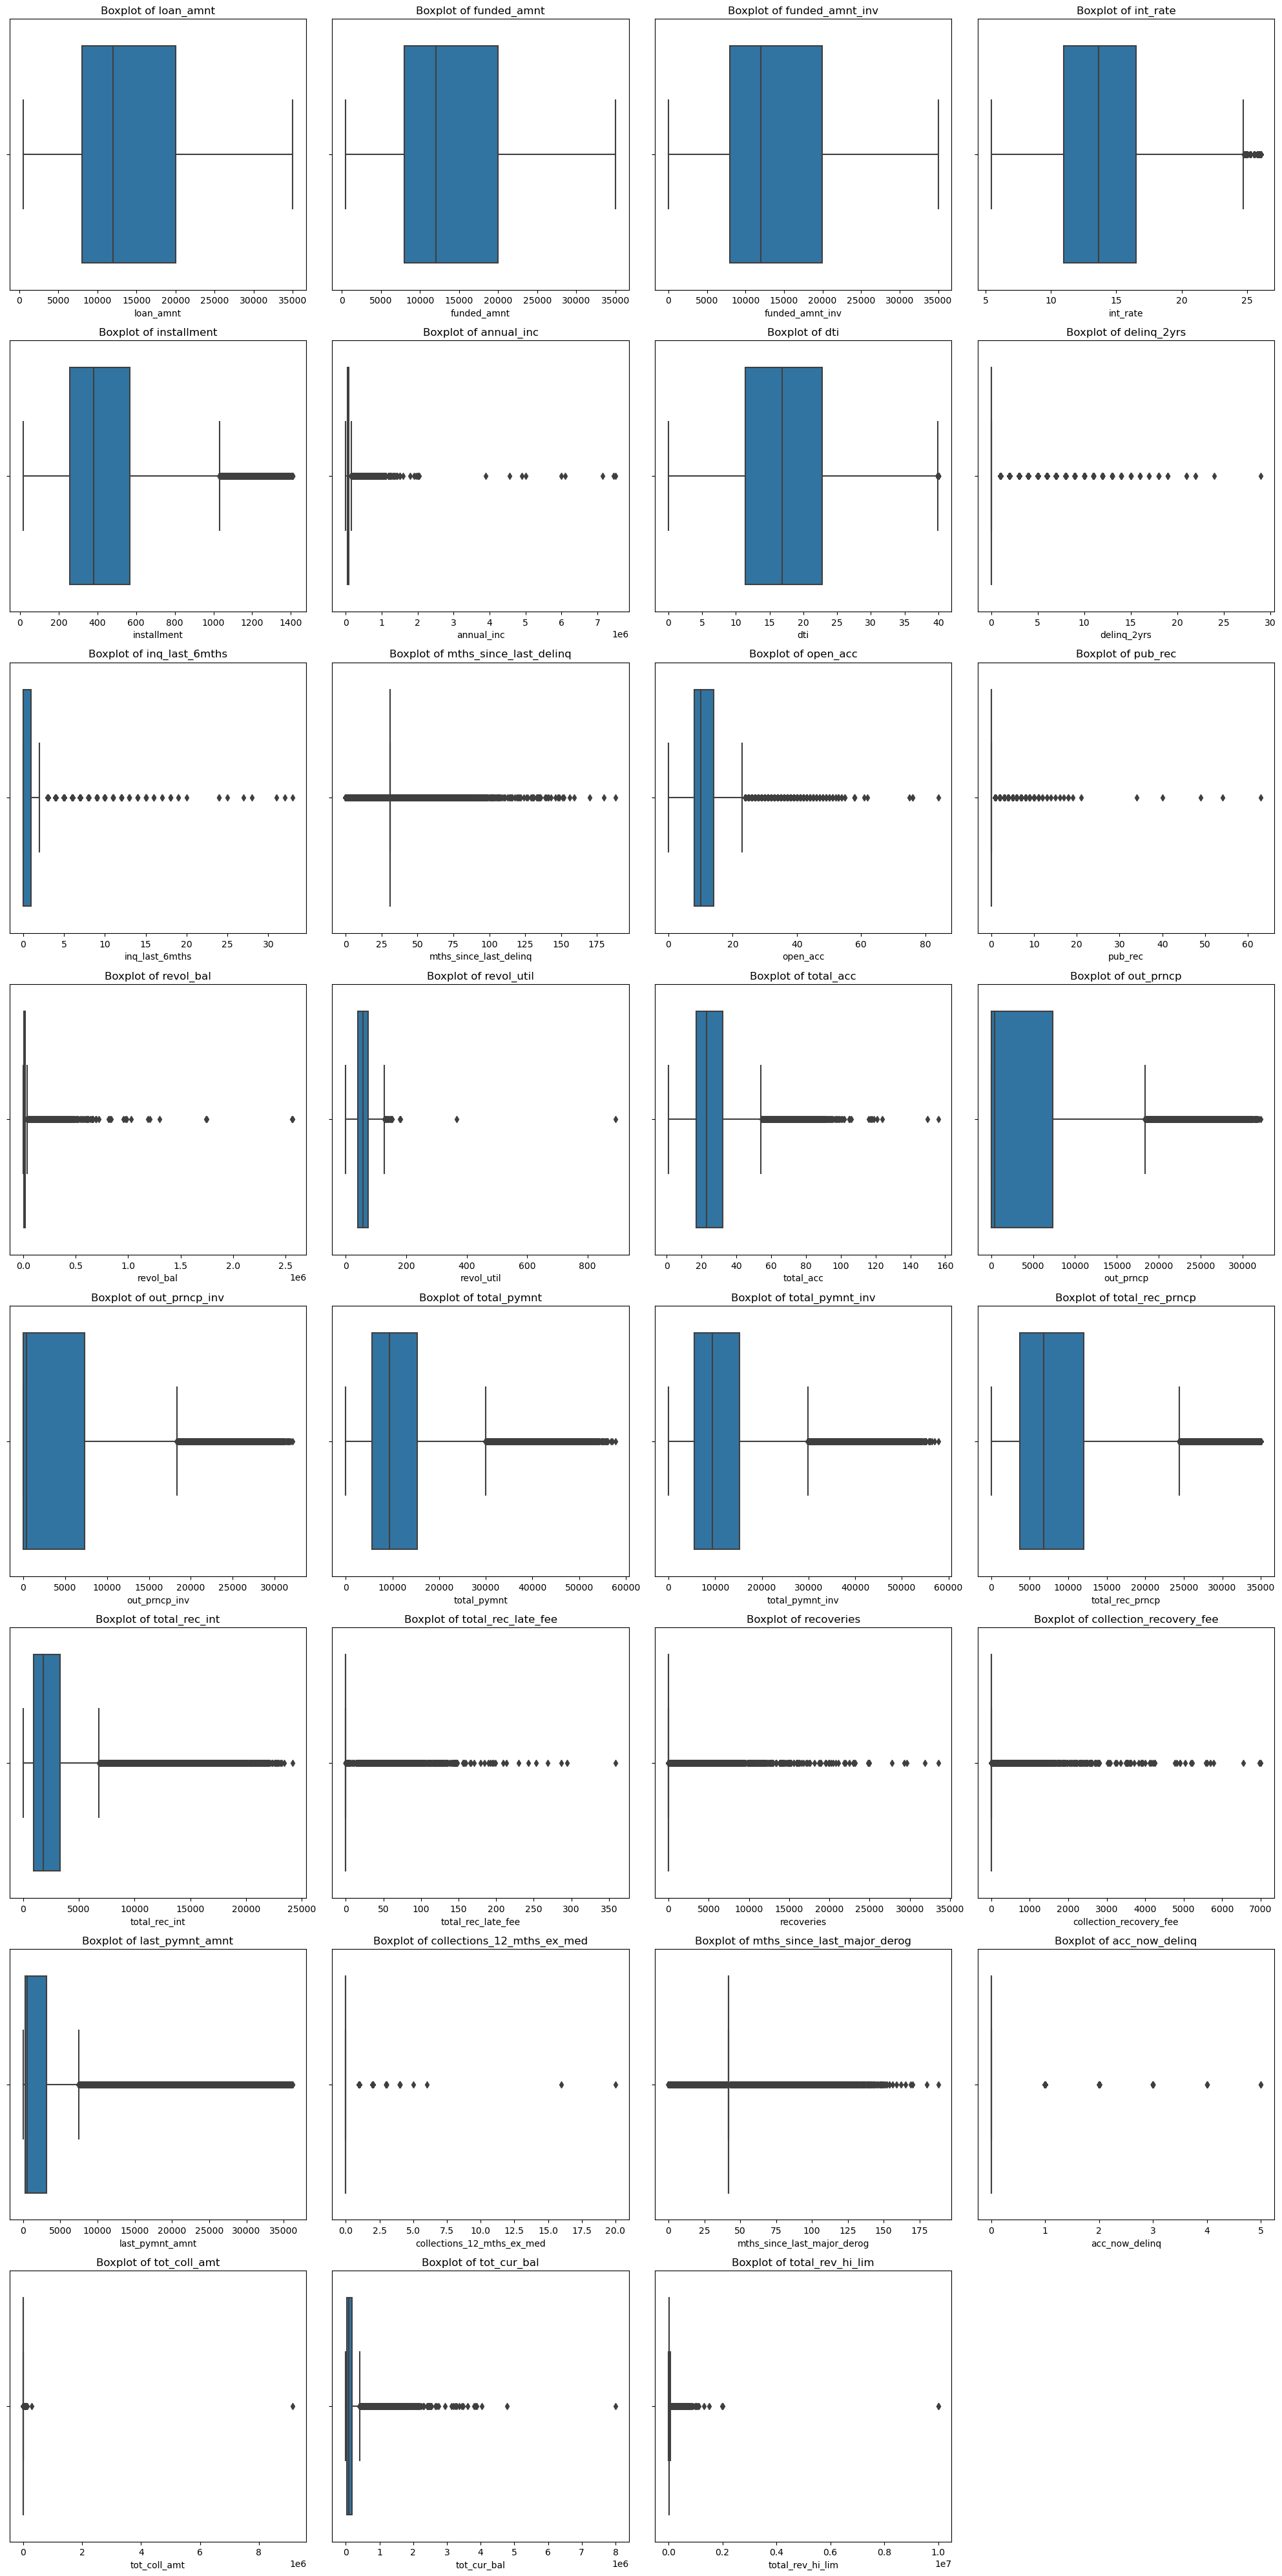

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 40))

for i, column in enumerate(df_num.columns):
    plt.subplot(8, 4, i + 1)
    sns.boxplot(data=df_num, x=column)
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)

plt.tight_layout()
plt.show()

### Distribution of Funded Amount

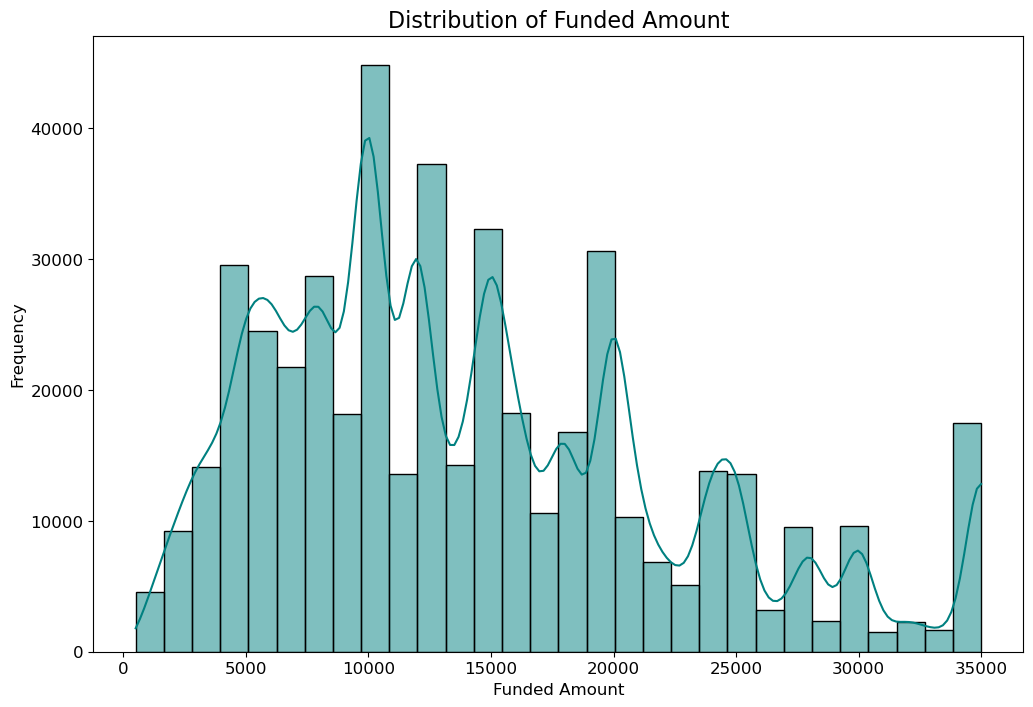

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.histplot(data=df, x='funded_amnt', bins=30, kde=True, color='teal')
plt.title('Distribution of Funded Amount', fontsize=16)
plt.xlabel('Funded Amount', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

**Funded Amount by Loan Status**

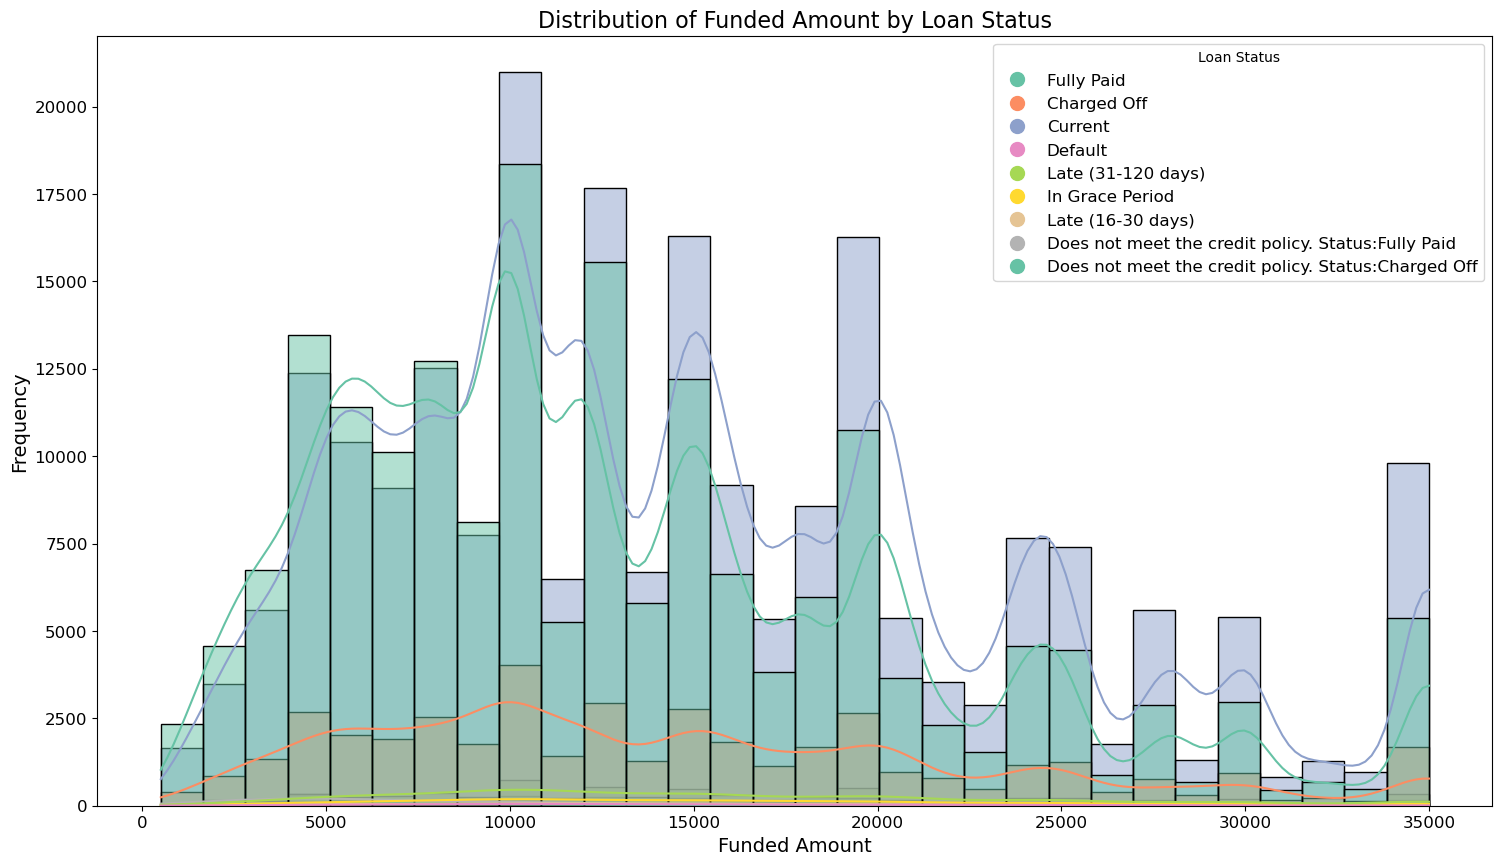

In [54]:
plt.figure(figsize=(18, 10))
sns.histplot(data=df, x='funded_amnt', bins=30, hue='loan_status', kde=True, palette='Set2')

# legenda
loan_status_categories = df['loan_status'].unique()
colors = sns.color_palette('Set2', len(loan_status_categories))
custom_legend = [plt.Line2D([0], [0], marker='o', color=color, lw=0, markersize=10) 
                 for color in colors]

plt.legend(custom_legend, loan_status_categories, title='Loan Status', fontsize=12)
plt.title('Distribution of Funded Amount by Loan Status', fontsize=16)
plt.xlabel('Funded Amount', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

### Distribution of Funded Amount by Investor

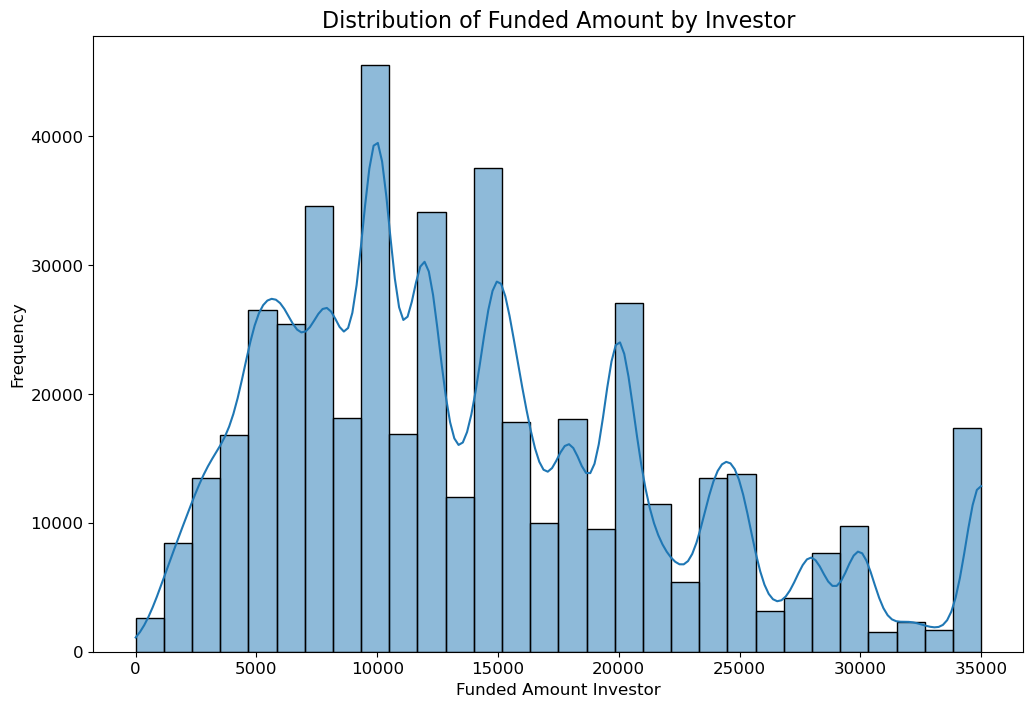

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.histplot(data=df, x='funded_amnt_inv', bins=30, kde=True, palette='set3')
plt.title('Distribution of Funded Amount by Investor', fontsize=16)
plt.xlabel('Funded Amount Investor', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

**Funded Amount Investor by Loan Status**

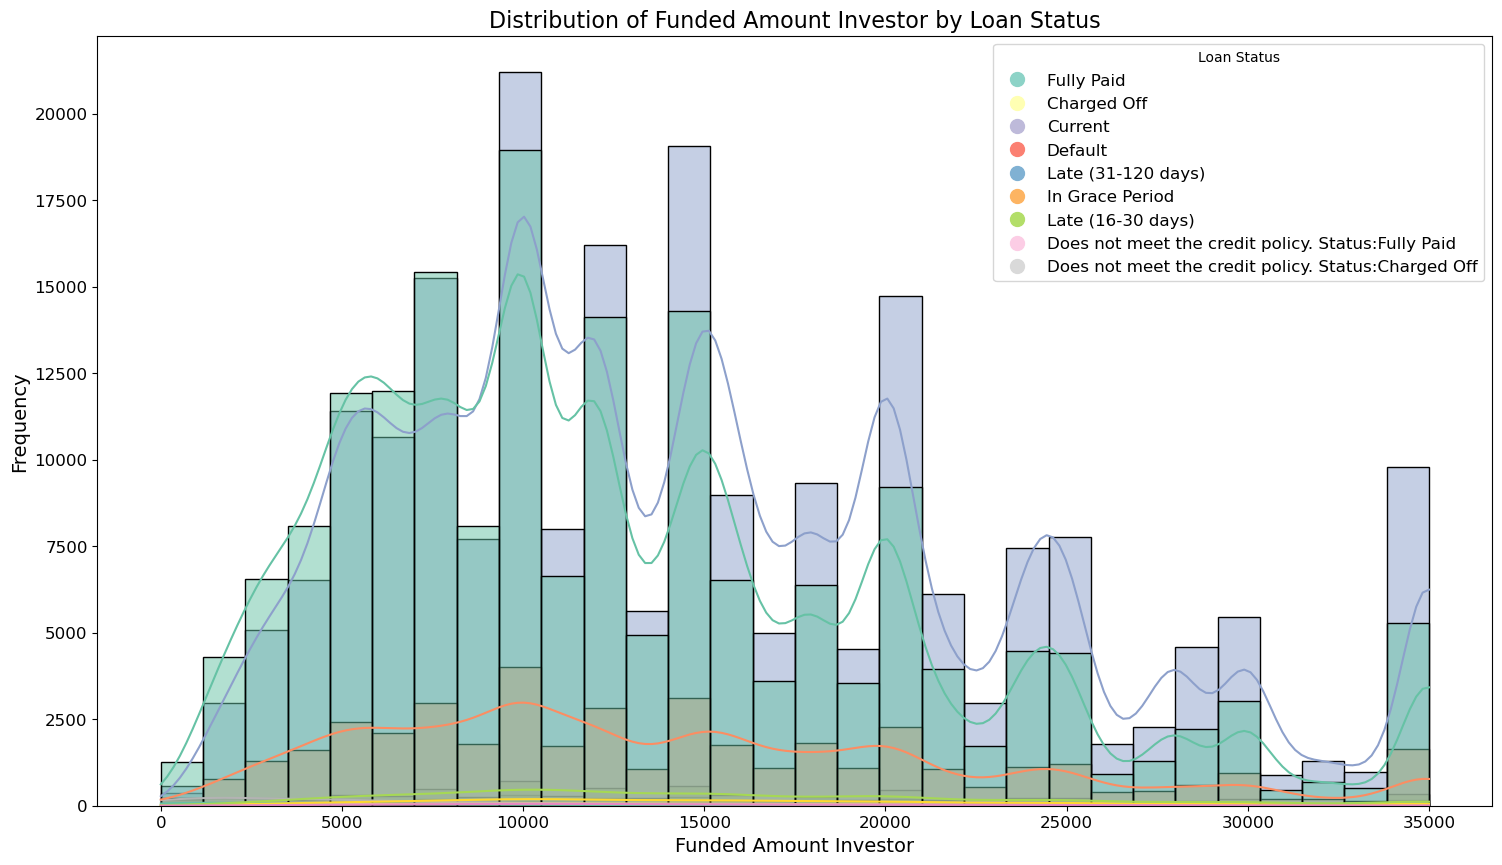

In [56]:
plt.figure(figsize=(18, 10))
sns.histplot(data=df, x='funded_amnt_inv', bins=30, hue='loan_status', kde=True, palette='Set2')

# legenda
loan_status_categories = df['loan_status'].unique()
colors = sns.color_palette('Set3', len(loan_status_categories))
custom_legend = [plt.Line2D([0], [0], marker='o', color=color, lw=0, markersize=10) 
                 for color in colors]

plt.legend(custom_legend, loan_status_categories, title='Loan Status', fontsize=12)
plt.title('Distribution of Funded Amount Investor by Loan Status', fontsize=16)
plt.xlabel('Funded Amount Investor', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

### Distribution of Loan Amount

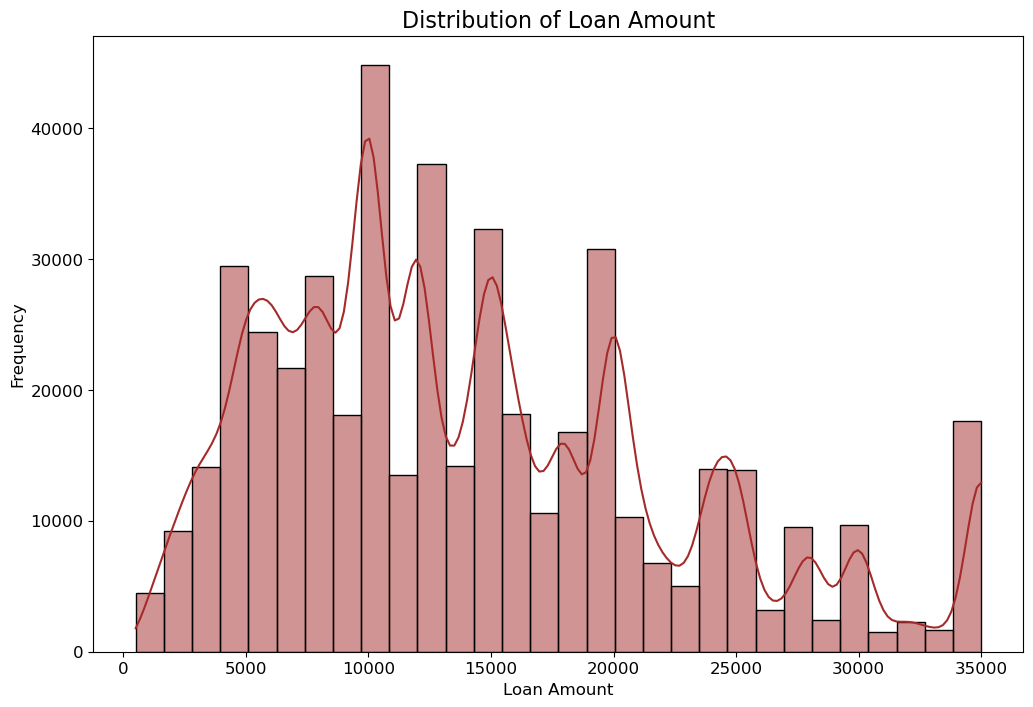

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.histplot(data=df, x='loan_amnt', bins=30, kde=True, color='brown')
plt.title('Distribution of Loan Amount', fontsize=16)
plt.xlabel('Loan Amount', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

**Loan Amount by Loan Status**

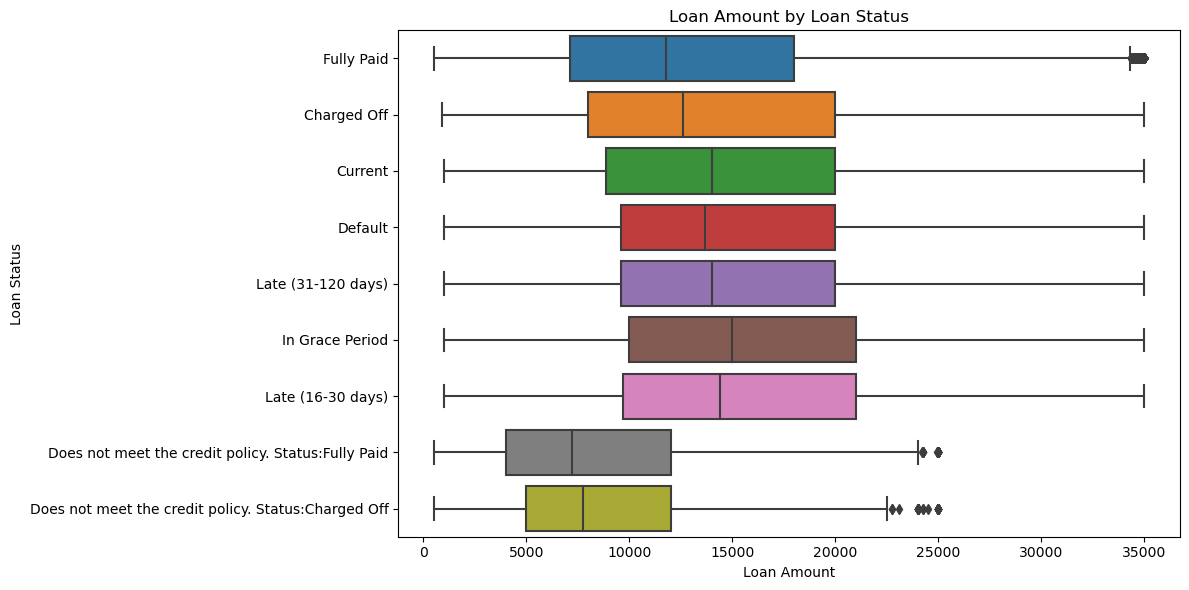

In [69]:
# loan_amnt by loan_status
plt.figure(figsize=(12, 6))
sns.boxplot(y='loan_status', x='loan_amnt', data=df)

plt.title('Loan Amount by Loan Status')
plt.ylabel('Loan Status')
plt.xlabel('Loan Amount')
plt.tight_layout()  
plt.show()

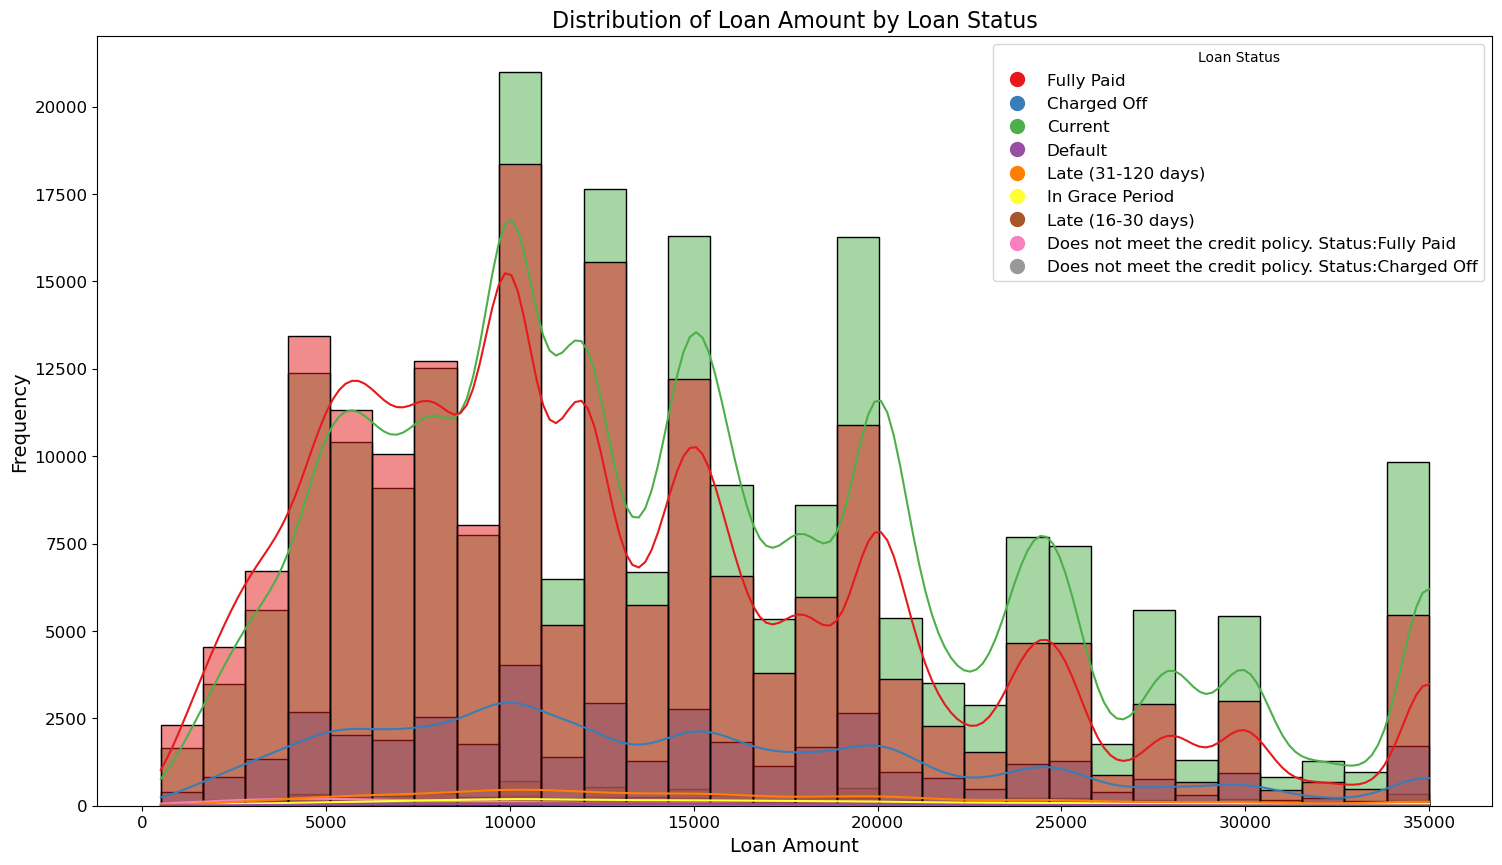

In [72]:
plt.figure(figsize=(18, 10))
sns.histplot(data=df, x='loan_amnt', bins=30, hue='loan_status', kde=True, palette='Set1')

# legenda
loan_status_categories = df['loan_status'].unique()
colors = sns.color_palette('Set1', len(loan_status_categories))
custom_legend = [plt.Line2D([0], [0], marker='o', color=color, lw=0, markersize=10) 
                 for color in colors]

plt.legend(custom_legend, loan_status_categories, title='Loan Status', fontsize=12)
plt.title('Distribution of Loan Amount by Loan Status', fontsize=16)
plt.xlabel('Loan Amount', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

### Loan_status Distribution

In [14]:
print(df['loan_status'].value_counts())

loan_status
Current                                                224226
Fully Paid                                             184739
Charged Off                                             42475
Late (31-120 days)                                       6900
In Grace Period                                          3146
Does not meet the credit policy. Status:Fully Paid       1988
Late (16-30 days)                                        1218
Default                                                   832
Does not meet the credit policy. Status:Charged Off       761
Name: count, dtype: int64


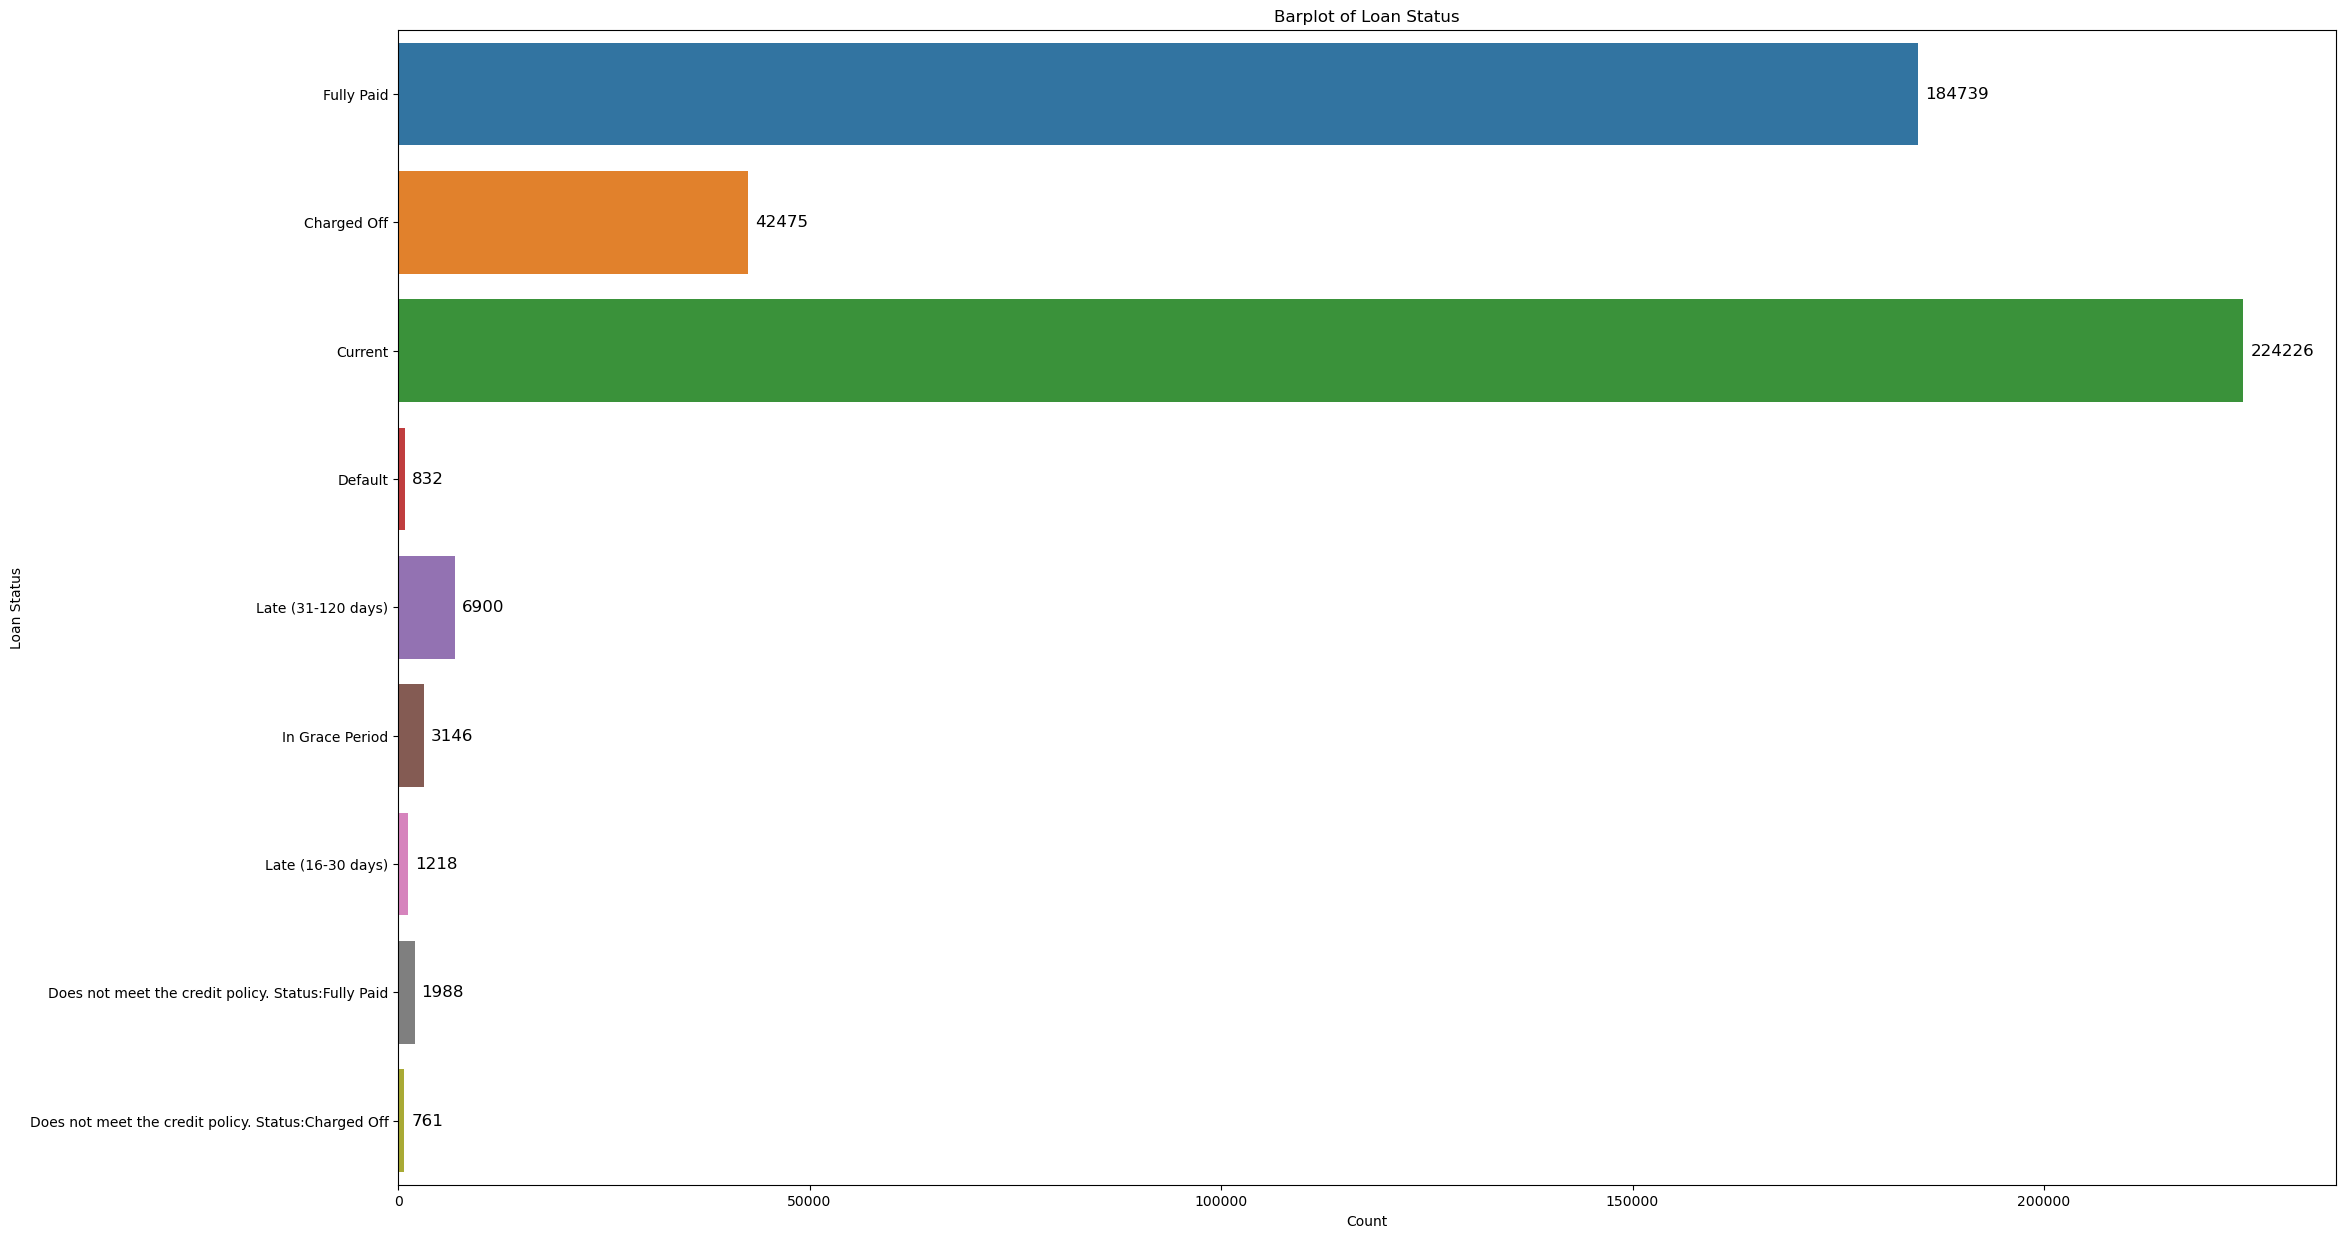

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(25, 15))
ax = sns.countplot(data=df, y='loan_status')

for p in ax.patches:
    ax.annotate(f'{int(p.get_width())}', 
                (p.get_width(), p.get_y() + p.get_height() / 2.), 
                ha='left', va='center', 
                fontsize=12, color='black', 
                xytext=(5, 0), textcoords='offset points')

plt.title('Barplot of Loan Status')
plt.xlabel('Count')
plt.ylabel('Loan Status')
plt.show()

### Dti VS Loan_status

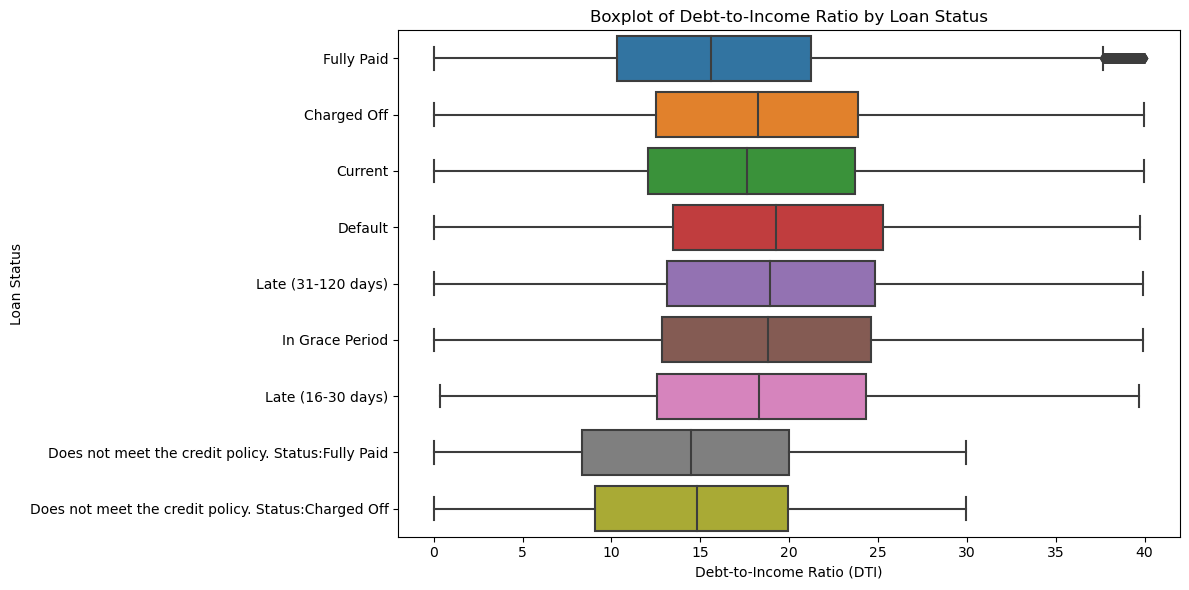

In [17]:
# dti by loan_status
plt.figure(figsize=(12, 6))
sns.boxplot(y='loan_status', x='dti', data=df)

plt.title('Boxplot of Debt-to-Income Ratio by Loan Status')
plt.ylabel('Loan Status')
plt.xlabel('Debt-to-Income Ratio (DTI)')
plt.tight_layout()
plt.show()

### Delinq_2yrs VS Loan_status

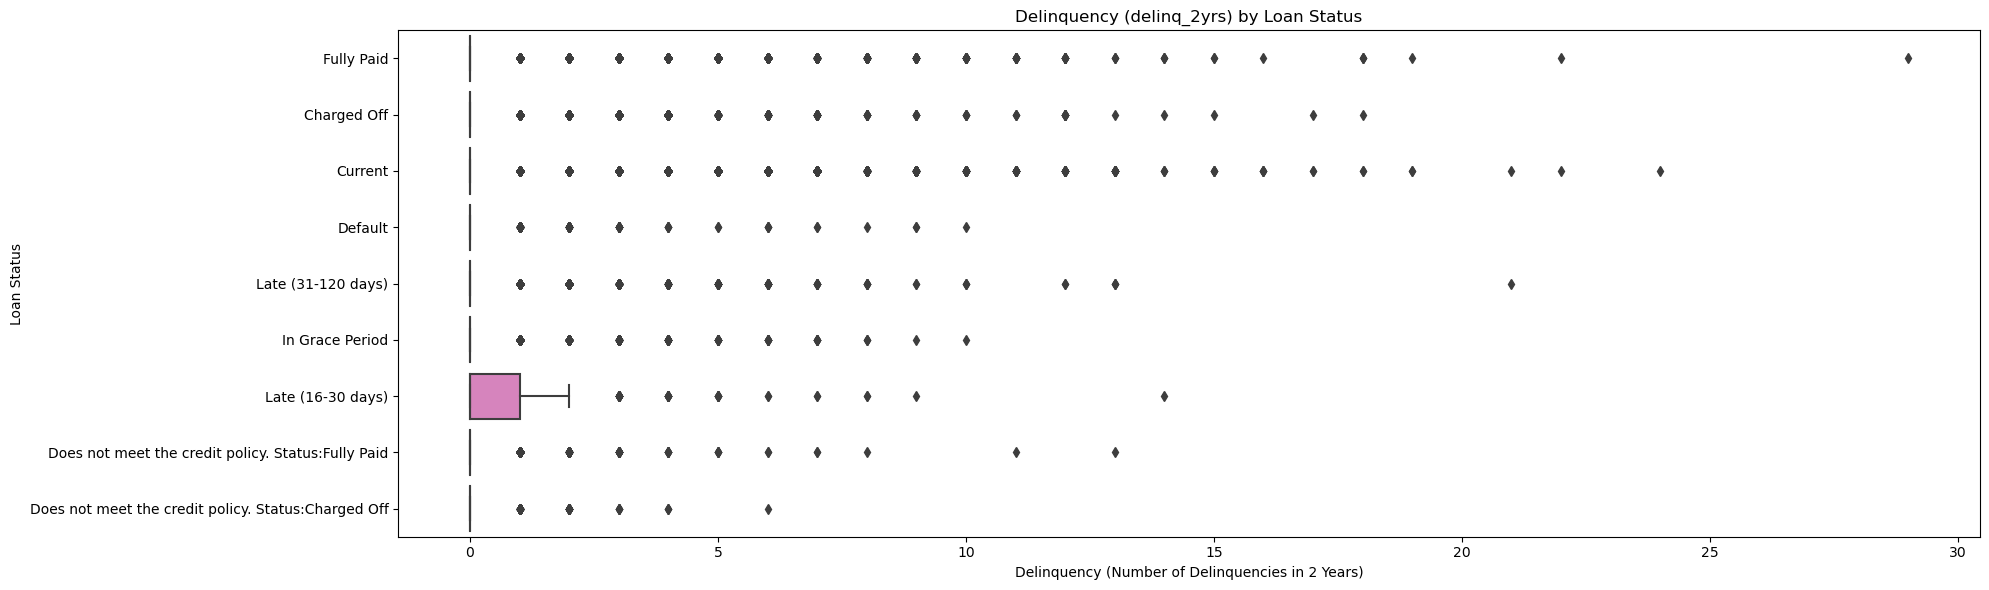

In [18]:
# delinq_2yrs by loan_status
plt.figure(figsize=(20, 6))
sns.boxplot(y='loan_status', x='delinq_2yrs', data=df)

plt.title('Delinquency (delinq_2yrs) by Loan Status')
plt.ylabel('Loan Status')
plt.xlabel('Delinquency (Number of Delinquencies in 2 Years)')
plt.tight_layout()
plt.show()

### Recoveries VS Loan_status

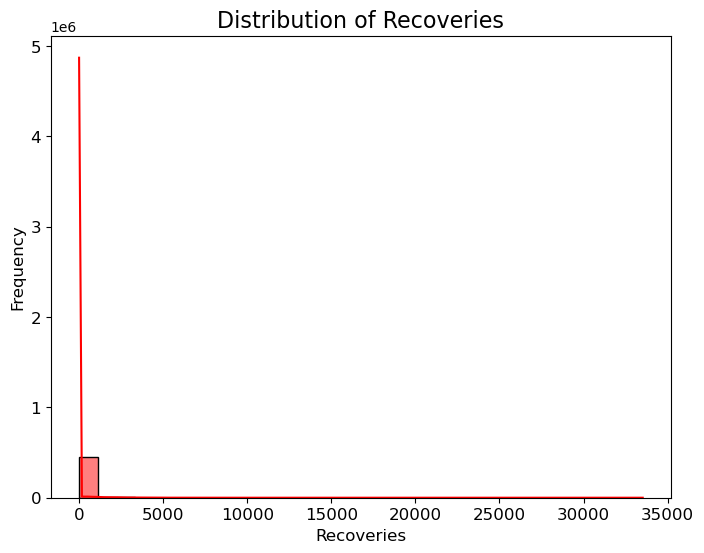

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='recoveries', bins=30, kde=True, color='red')
plt.title('Distribution of Recoveries', fontsize=16)
plt.xlabel('Recoveries', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

**Recoveries by loan_status**

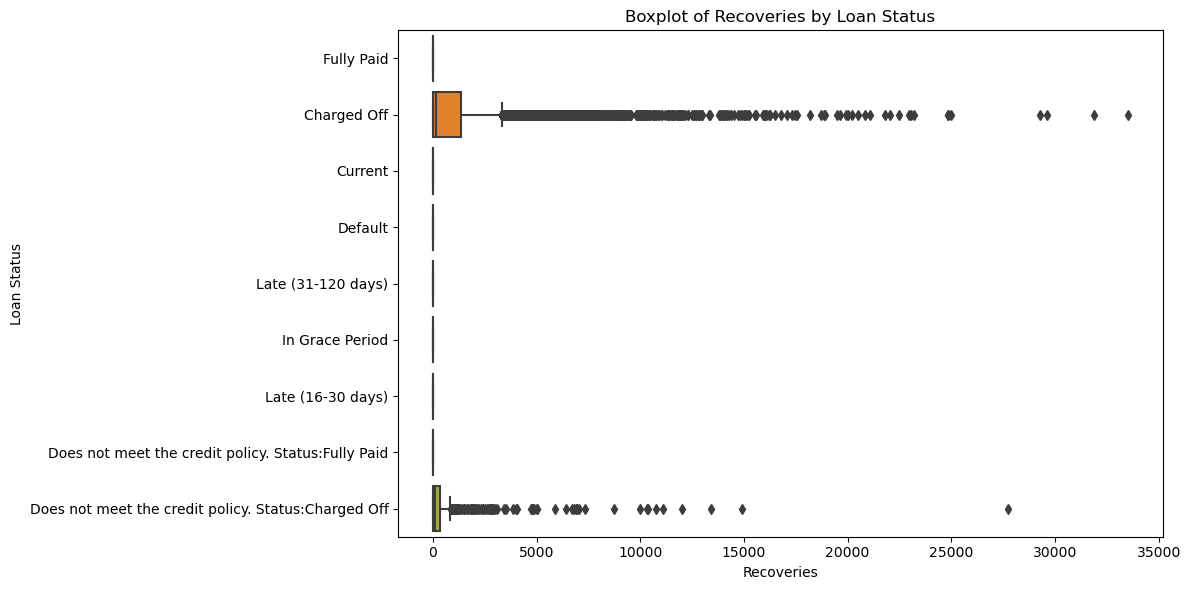

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Recoveries by loan_status
plt.figure(figsize=(12, 6))
sns.boxplot(y='loan_status', x='recoveries', data=df)

plt.title('Boxplot of Recoveries by Loan Status')
plt.ylabel('Loan Status')
plt.xlabel('Recoveries')
plt.tight_layout()
plt.show()

### Grade Distribution

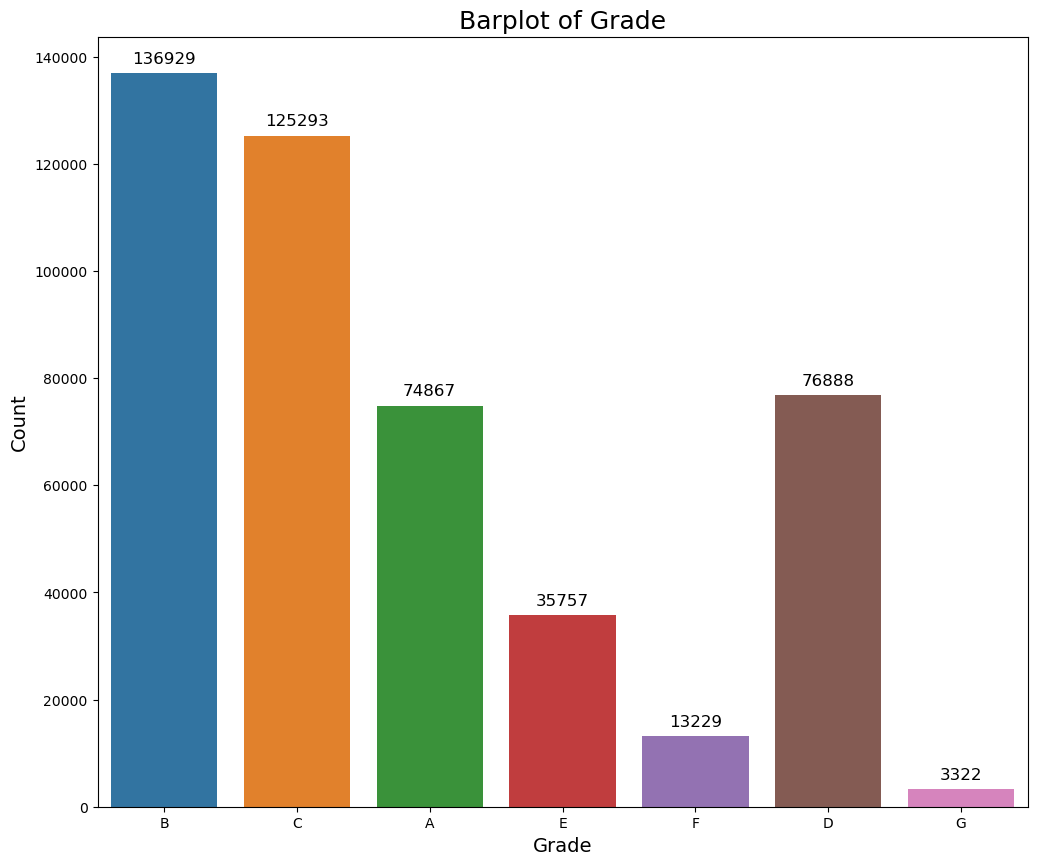

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))

ax = sns.countplot(data=df, x='grade')
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom',
                fontsize=12, color='black',
                xytext=(0, 5), textcoords='offset points')

plt.title('Barplot of Grade', fontsize=18)
plt.xlabel('Grade', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

**Distribution of Sub Grade**

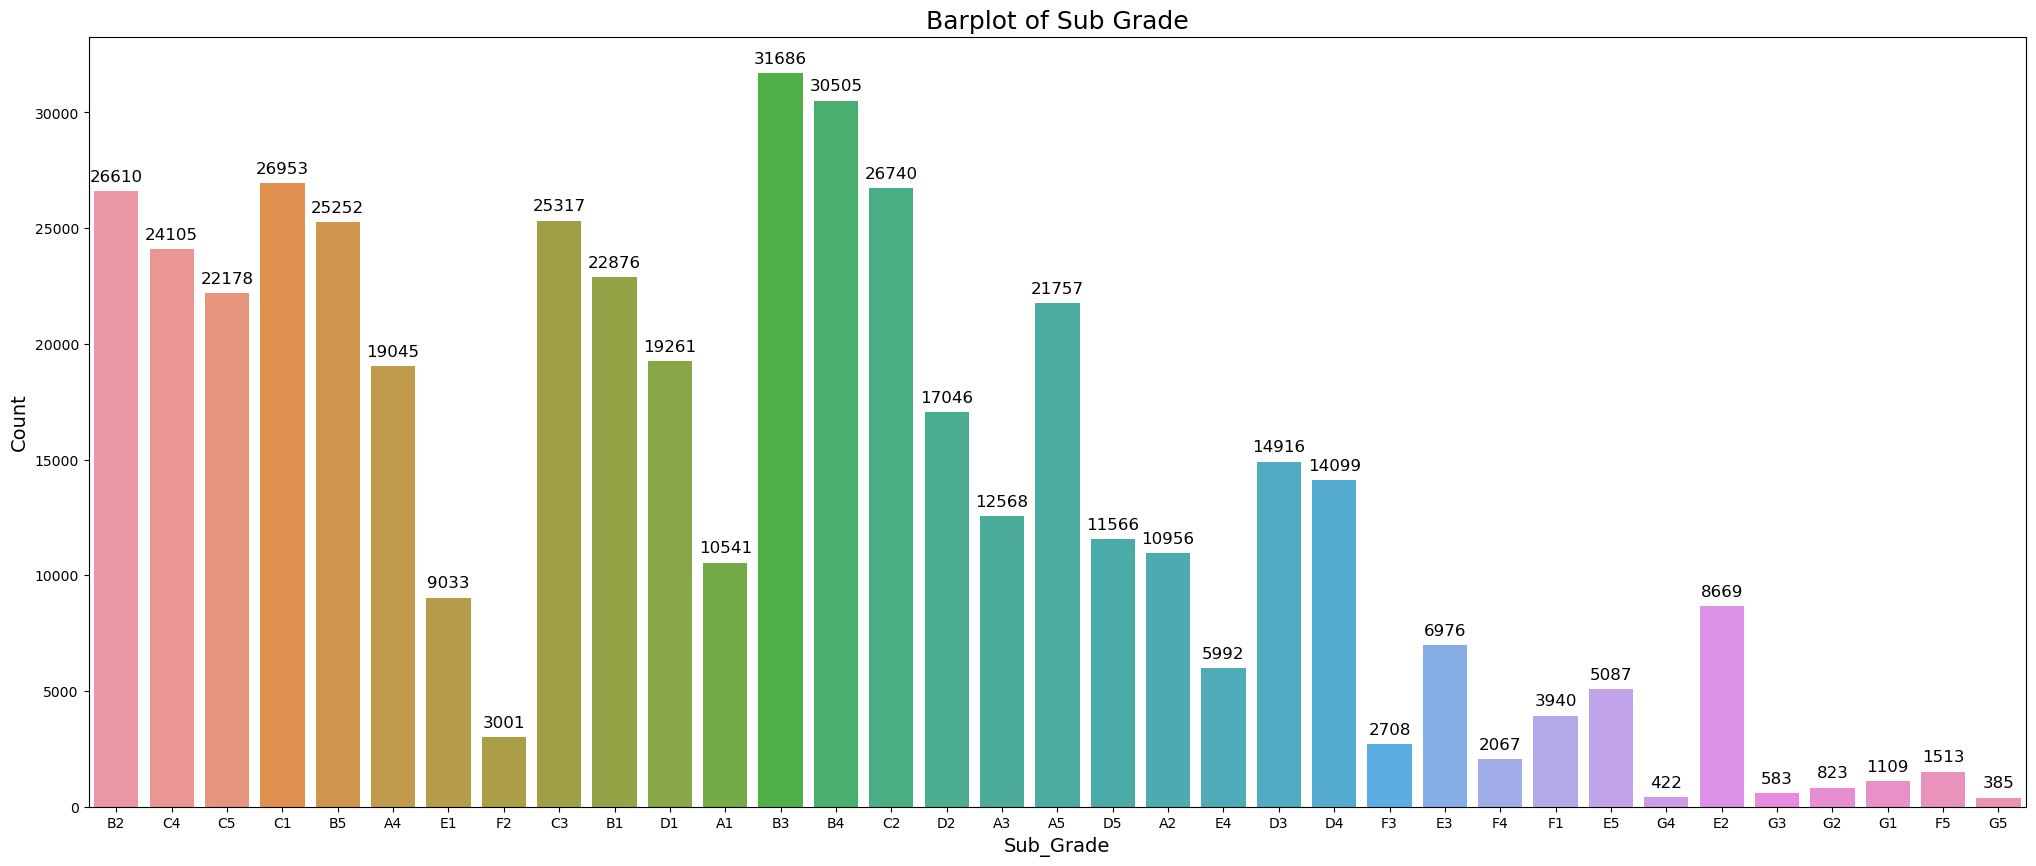

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(25, 10))

ax = sns.countplot(data=df, x='sub_grade')
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom',
                fontsize=12, color='black',
                xytext=(0, 5), textcoords='offset points')

plt.title('Barplot of Sub Grade', fontsize=18)
plt.xlabel('Sub_Grade', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

#### Grade by Loan_Status

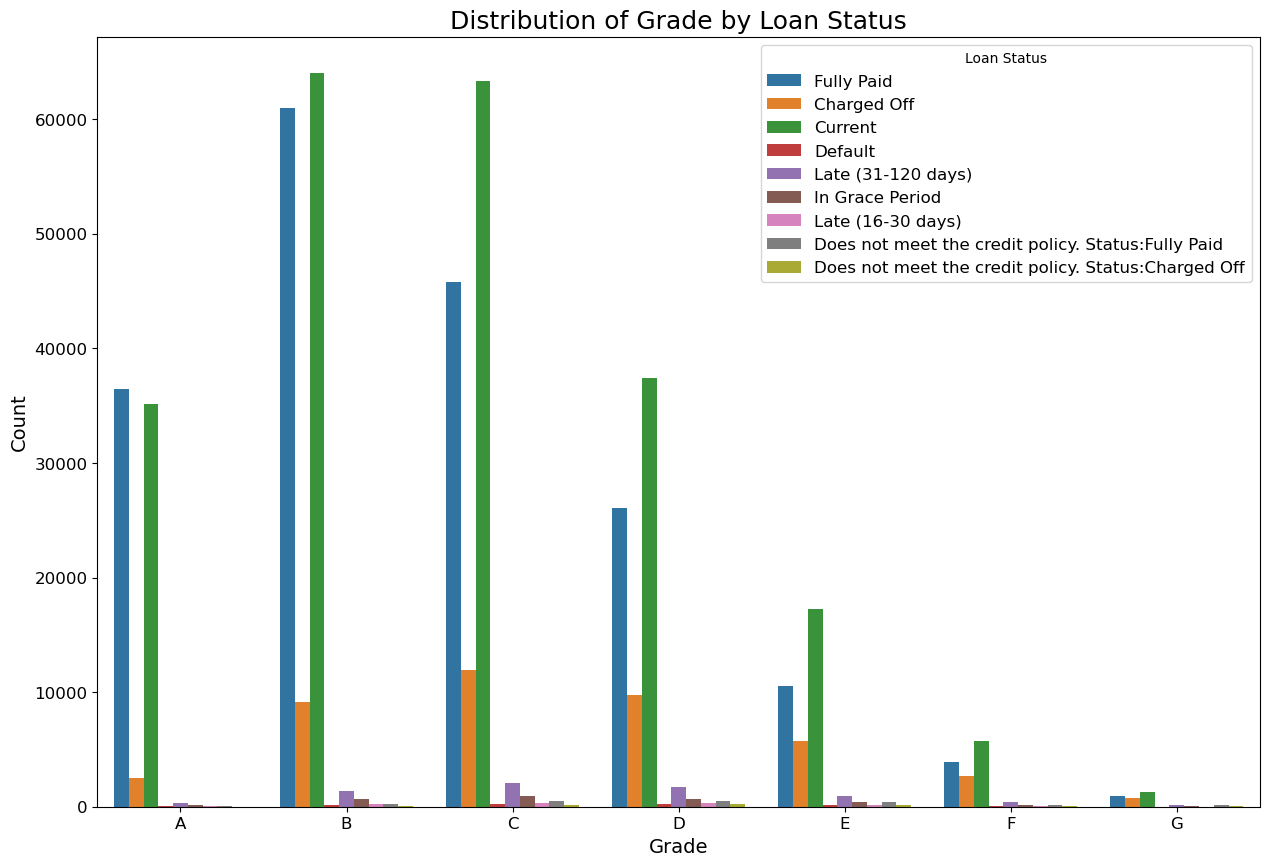

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))

sns.countplot(data=df, x='grade', hue='loan_status', order=sorted(df['grade'].unique()))
plt.title('Distribution of Grade by Loan Status', fontsize=18)
plt.xlabel('Grade', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(title='Loan Status', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

#### Grade by Employment Length

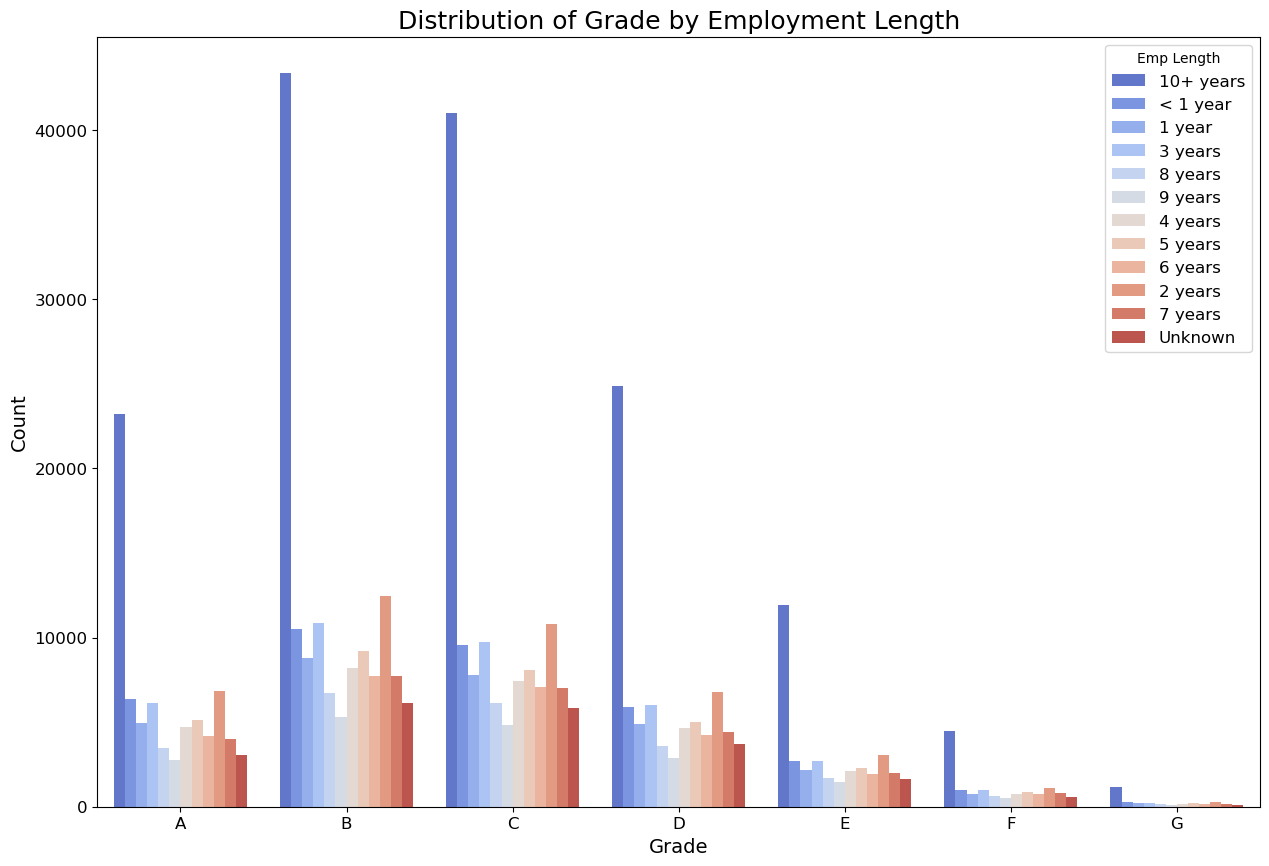

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))
sns.countplot(
    data=df, 
    x='grade', 
    hue='emp_length', 
    order=sorted(df['grade'].unique()), 
    palette='coolwarm'
)

plt.title('Distribution of Grade by Employment Length', fontsize=18)
plt.xlabel('Grade', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(title='Emp Length', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

### Home Ownership Distribution

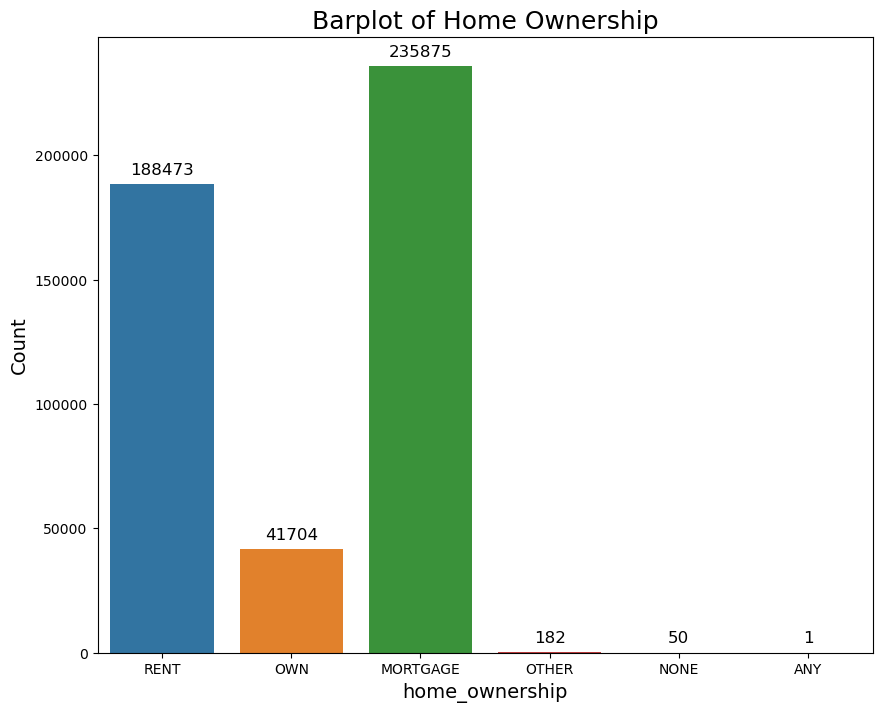

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))

ax = sns.countplot(data=df, x='home_ownership')
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom',
                fontsize=12, color='black',
                xytext=(0, 5), textcoords='offset points')

plt.title('Barplot of Home Ownership', fontsize=18)
plt.xlabel('home_ownership', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

**Home Ownership by Loan_Status**

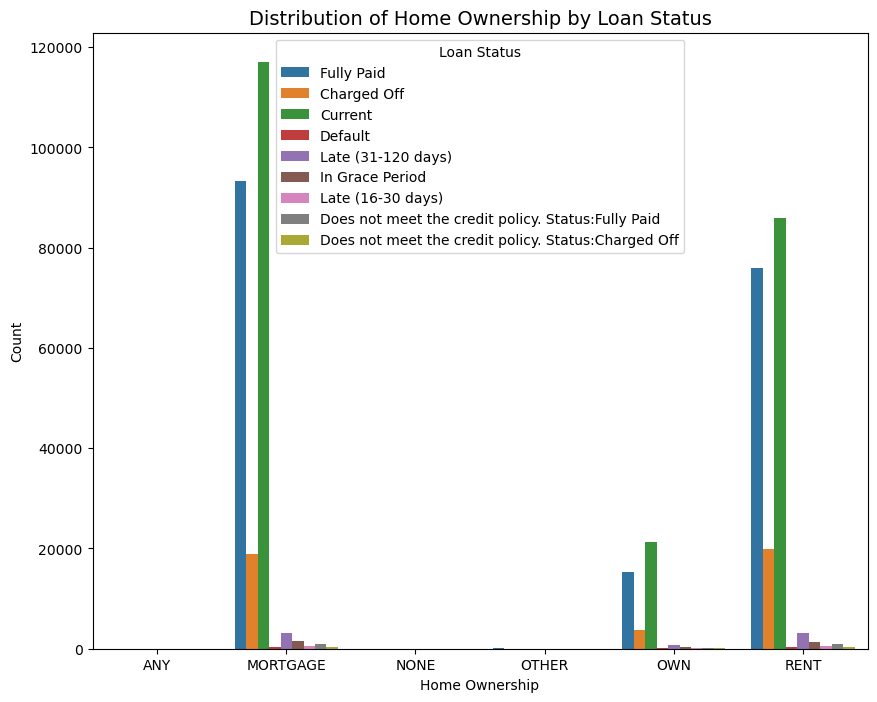

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))

sns.countplot(data=df, x='home_ownership', hue='loan_status', order=sorted(df['home_ownership'].unique()))
plt.title('Distribution of Home Ownership by Loan Status', fontsize=14)
plt.xlabel('Home Ownership', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.legend(title='Loan Status', fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

### Distribution of Employment Length

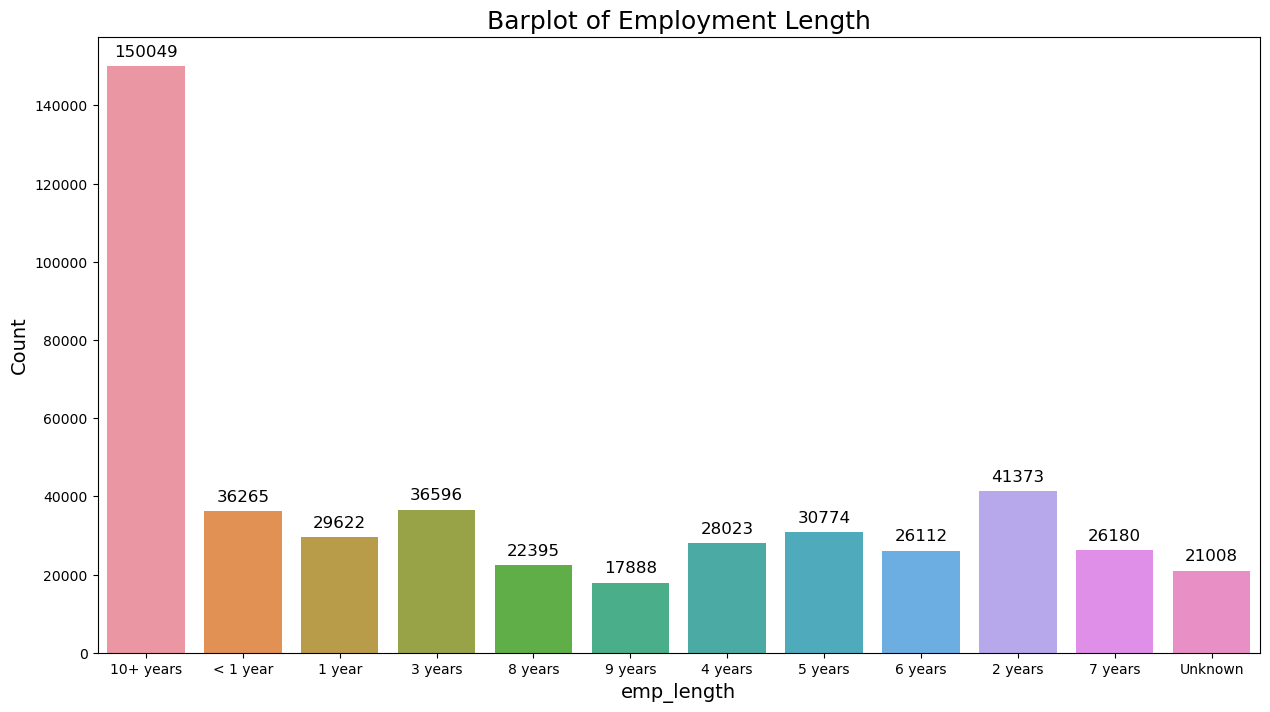

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 8))

ax = sns.countplot(data=df, x='emp_length')
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom',
                fontsize=12, color='black',
                xytext=(0, 5), textcoords='offset points')

plt.title('Barplot of Employment Length', fontsize=18)
plt.xlabel('emp_length', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

**Employment Length by Loan Status**

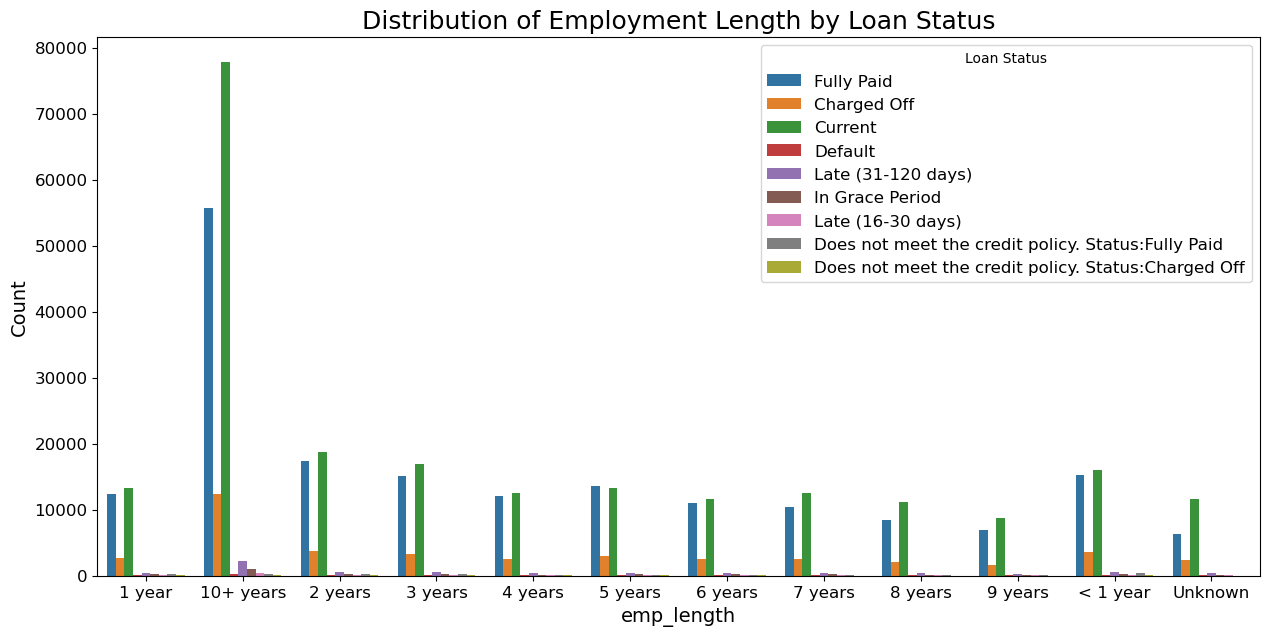

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 7))

sns.countplot(data=df, x='emp_length', hue='loan_status', order=sorted(df['emp_length'].unique()))
plt.title('Distribution of Employment Length by Loan Status', fontsize=18)
plt.xlabel('emp_length', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(title='Loan Status', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

### Distribution of Purpose

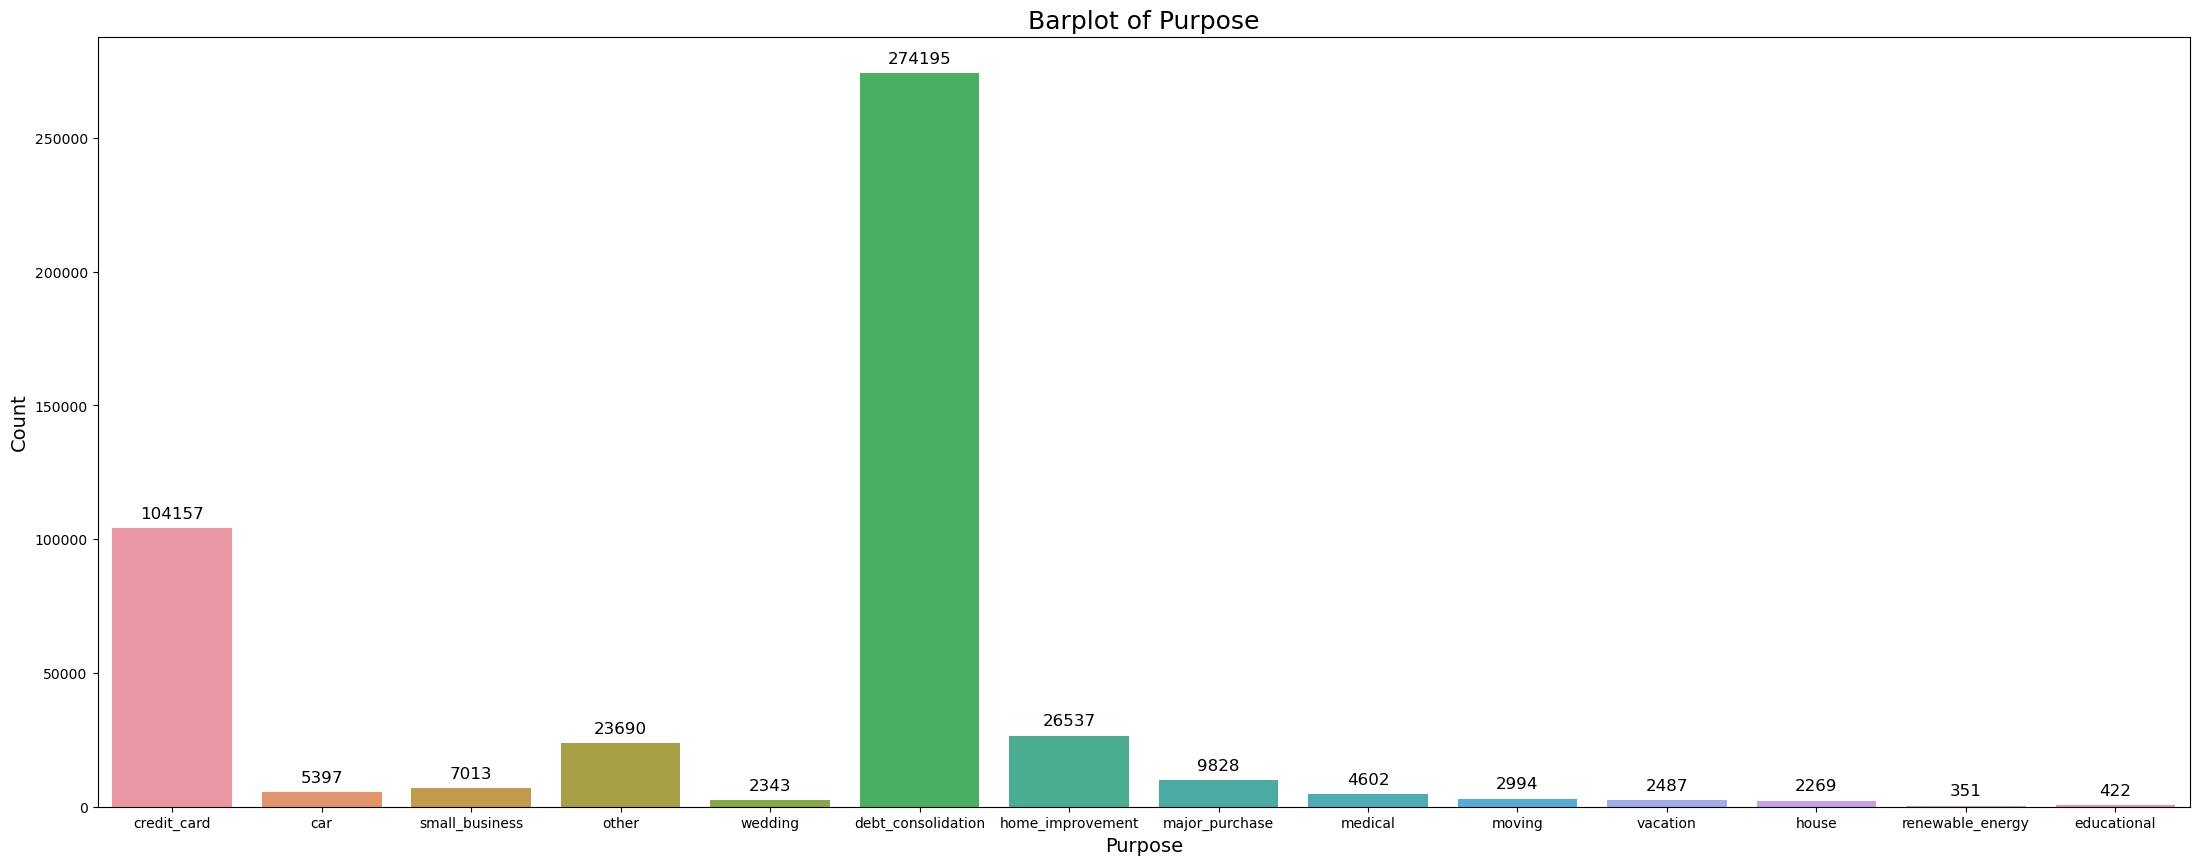

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(27, 10))

ax = sns.countplot(data=df, x='purpose')
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom',
                fontsize=12, color='black',
                xytext=(0, 5), textcoords='offset points')

plt.title('Barplot of Purpose', fontsize=18)
plt.xlabel('Purpose', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

**Purpose by Loan_Status**

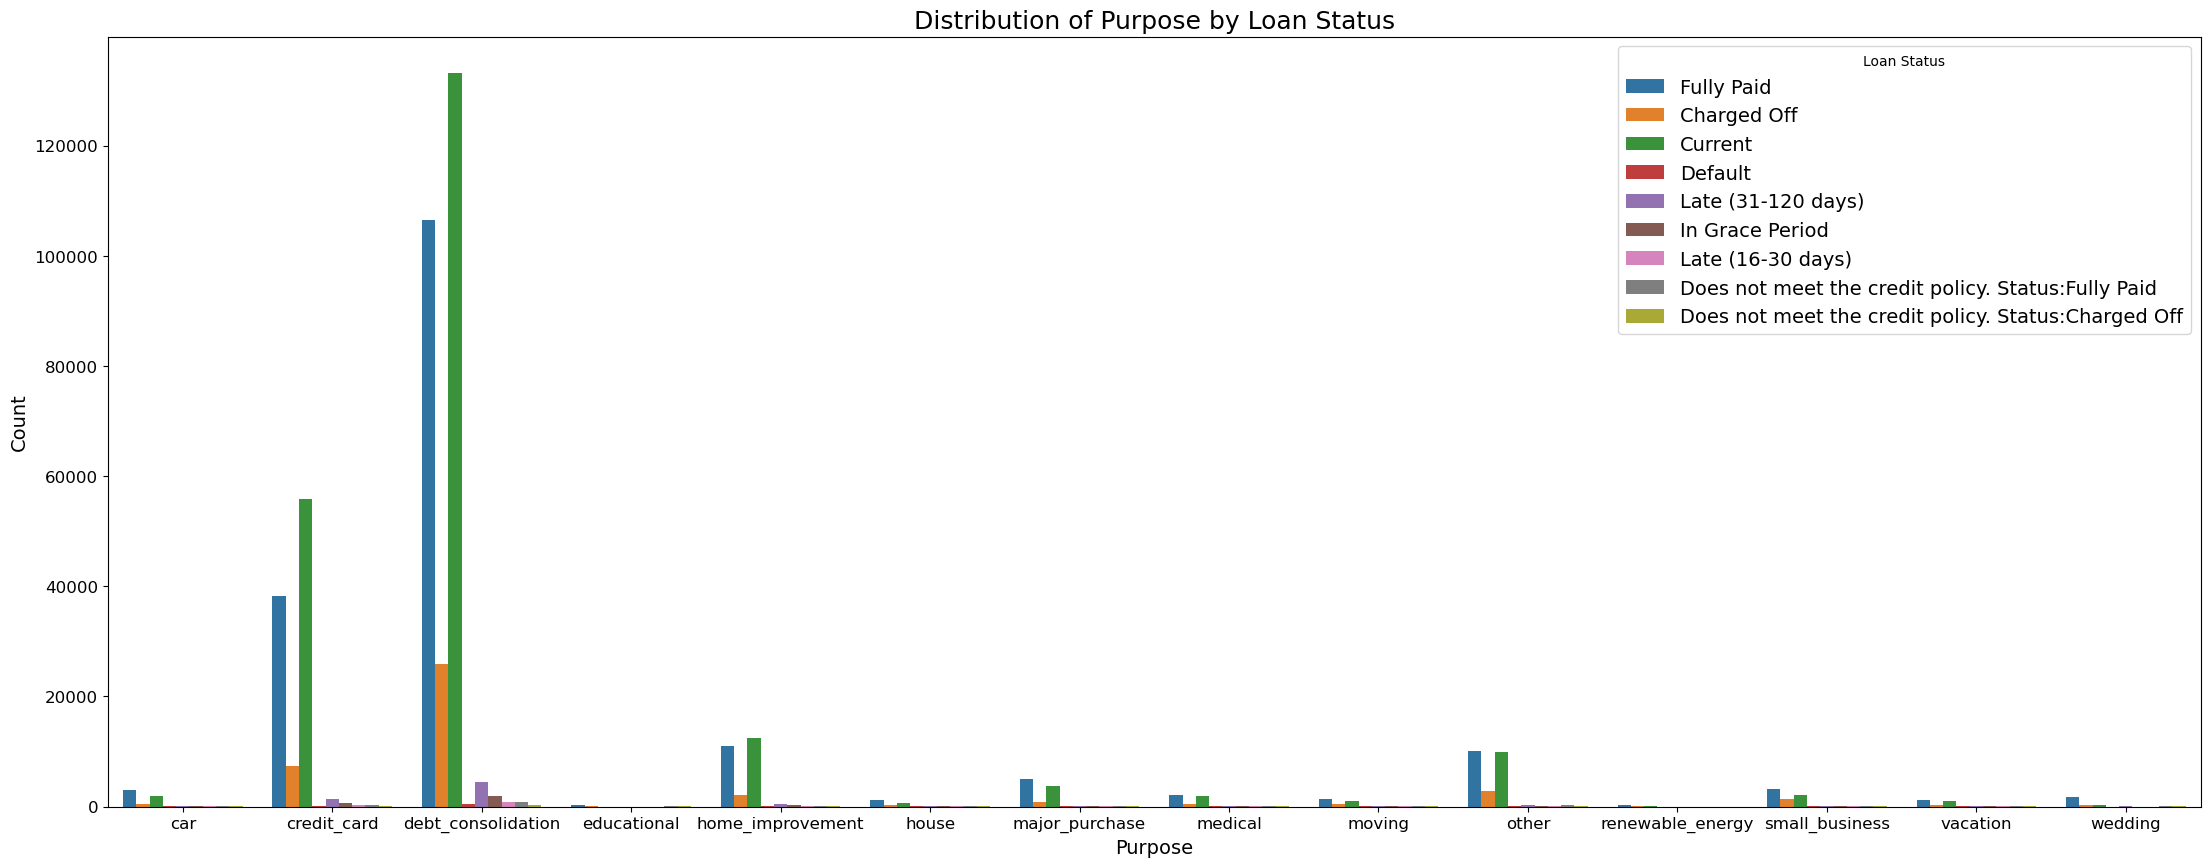

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(27, 10))

sns.countplot(data=df, x='purpose', hue='loan_status', order=sorted(df['purpose'].unique()))
plt.title('Distribution of Purpose by Loan Status', fontsize=18)
plt.xlabel('Purpose', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(title='Loan Status', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

### **Distribution of Loan Term**

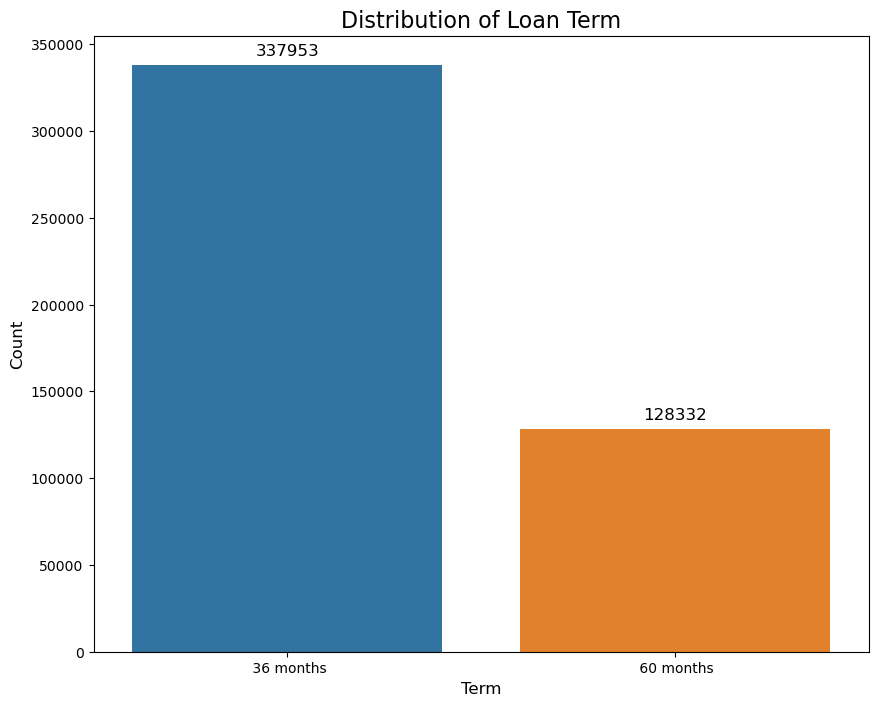

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))

ax = sns.countplot(data=df, x='term')
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom',
                fontsize=12, color='black',
                xytext=(0, 5), textcoords='offset points')

plt.title('Distribution of Loan Term', fontsize=16)
plt.xlabel('Term', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

**Loan Term by Loan Status**

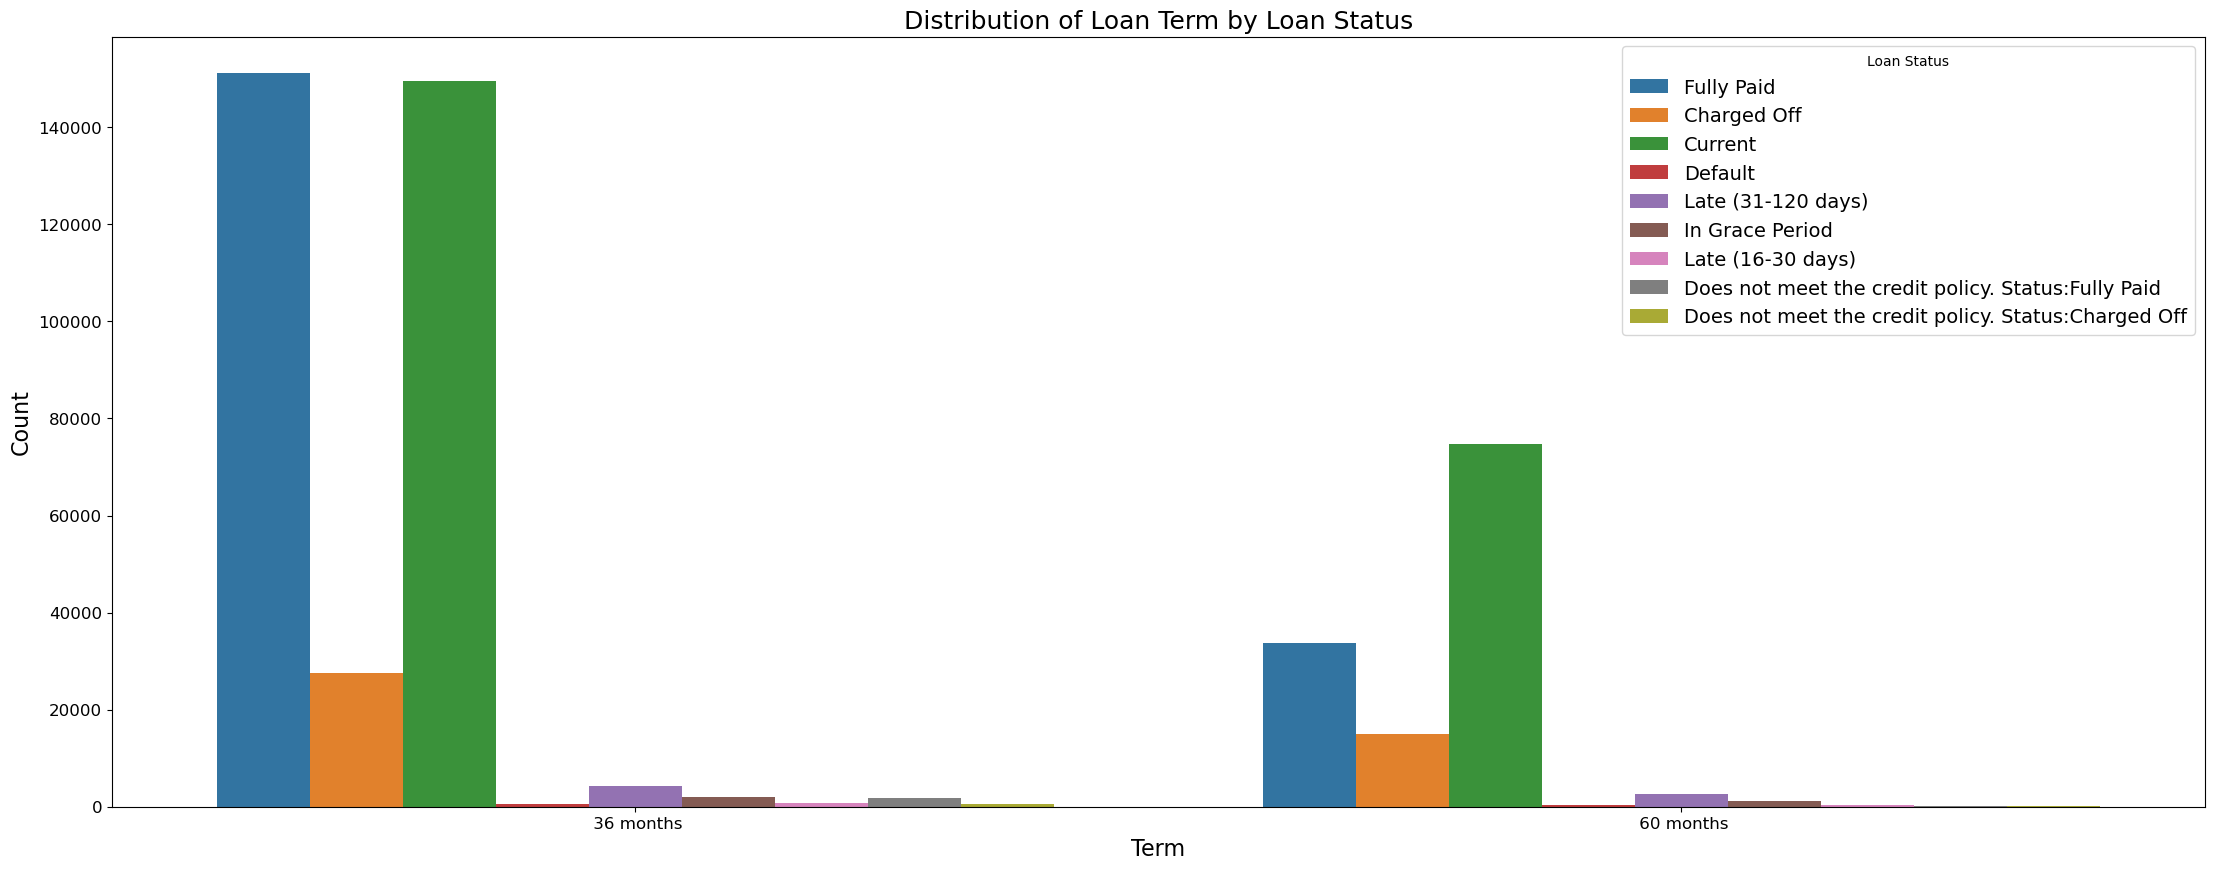

In [81]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(27, 10))

sns.countplot(data=df, x='term', hue='loan_status', order=sorted(df['term'].unique()))
plt.title('Distribution of Loan Term by Loan Status', fontsize=18)
plt.xlabel('Term', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.legend(title='Loan Status', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

## Data Pre-Processing

### Feature Engineering

**Create new column : Credit Status** <br>
The column used to determine the classification label of 'good' or 'bad' is the **'loan_status'** column.

Here is the logical explanation for each category based on the `loan_status` column: 
1. **Fully Paid** <br>
This status indicates that the loan has been fully repaid according to the payment schedule. <br>
Classified as a **GOOD** category because the borrower fulfilled their obligations without any issues.<br> 
2. **Current** <br>
The loan is active, and payments are being made as scheduled.<br>
Classified as a **GOOD** category because the borrower is still making payments as expected. <br>
3. **In Grace Period** <br>
This indicates the borrower has missed the due date but is still within the grace period (usually a few days).<br>
This is classified as neutral or slightly risky but not yet considered bad. Therefore, it is included in the **GOOD** category.<br> 
4. **Late (16-30 days)** <br>
The loan is late by 16 to 30 days from the payment schedule.  <br>
This is considered an early sign of risk. To minimize potential future risk prediction errors, it is classified as a **BAD** category.<br>
5. **Late (31-120 days)** 
The loan is late by 31 to 120 days, indicating more serious financial problems.  
Classified as a **BAD** category due to the increasing risk of default.
6. **Default**<br>
The loan is in default status. The borrower is unable to repay their debt.<br>
Clearly included in the **BAD** category <br>
7. **Charged Off** <br>
The loan has been written off as uncollectible and removed from the credit ledger. This is the final step if the loan cannot be repaid. <br>
Classified as a **BAD** category. <br>
8. **Does not meet the credit policy. Status: Fully Paid**<br>
This loan initially did not meet the credit policy but was still fully repaid by the borrower. <br>
Considered as **GOOD**, as the borrower successfully repaid the loan despite the initial risk. <br> 
9. **Does not meet the credit policy. Status: Charged Off** <br>
This loan initially did not meet the credit policy and eventually defaulted.  <br>
Classified as a **BAD** category because the borrower failed to repay the loan.<br>

In [6]:
def determine_label(row):
    # GOOD status
    if row['loan_status'] in ['Fully Paid', 'Current', 'In Grace Period', 
                              'Does not meet the credit policy. Status:Fully Paid']:
        return 'GOOD'
    # BAD status
    elif row['loan_status'] in ['Charged Off', 'Default', 'Late (16-30 days)', 
                                'Late (31-120 days)', 'Does not meet the credit policy. Status:Charged Off']:
        return 'BAD'

# Define as "credit_label" column
df['credit_status'] = df.apply(determine_label, axis=1)

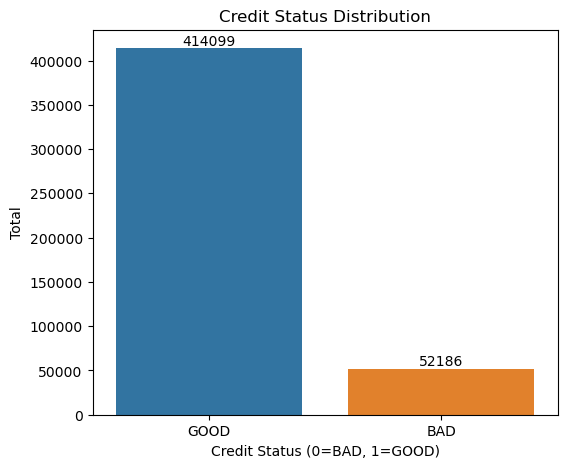

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

resign_counts = df['credit_status'].value_counts()

plt.figure(figsize=(6, 5))
sns.barplot(x=resign_counts.index, y=resign_counts.values)
plt.xlabel('Credit Status (0=BAD, 1=GOOD)')
plt.ylabel('Total')
plt.title('Credit Status Distribution')
for i, v in enumerate(resign_counts.values):
    plt.text(i, v + 0.05, str(v), ha='center', va='bottom')

plt.show()

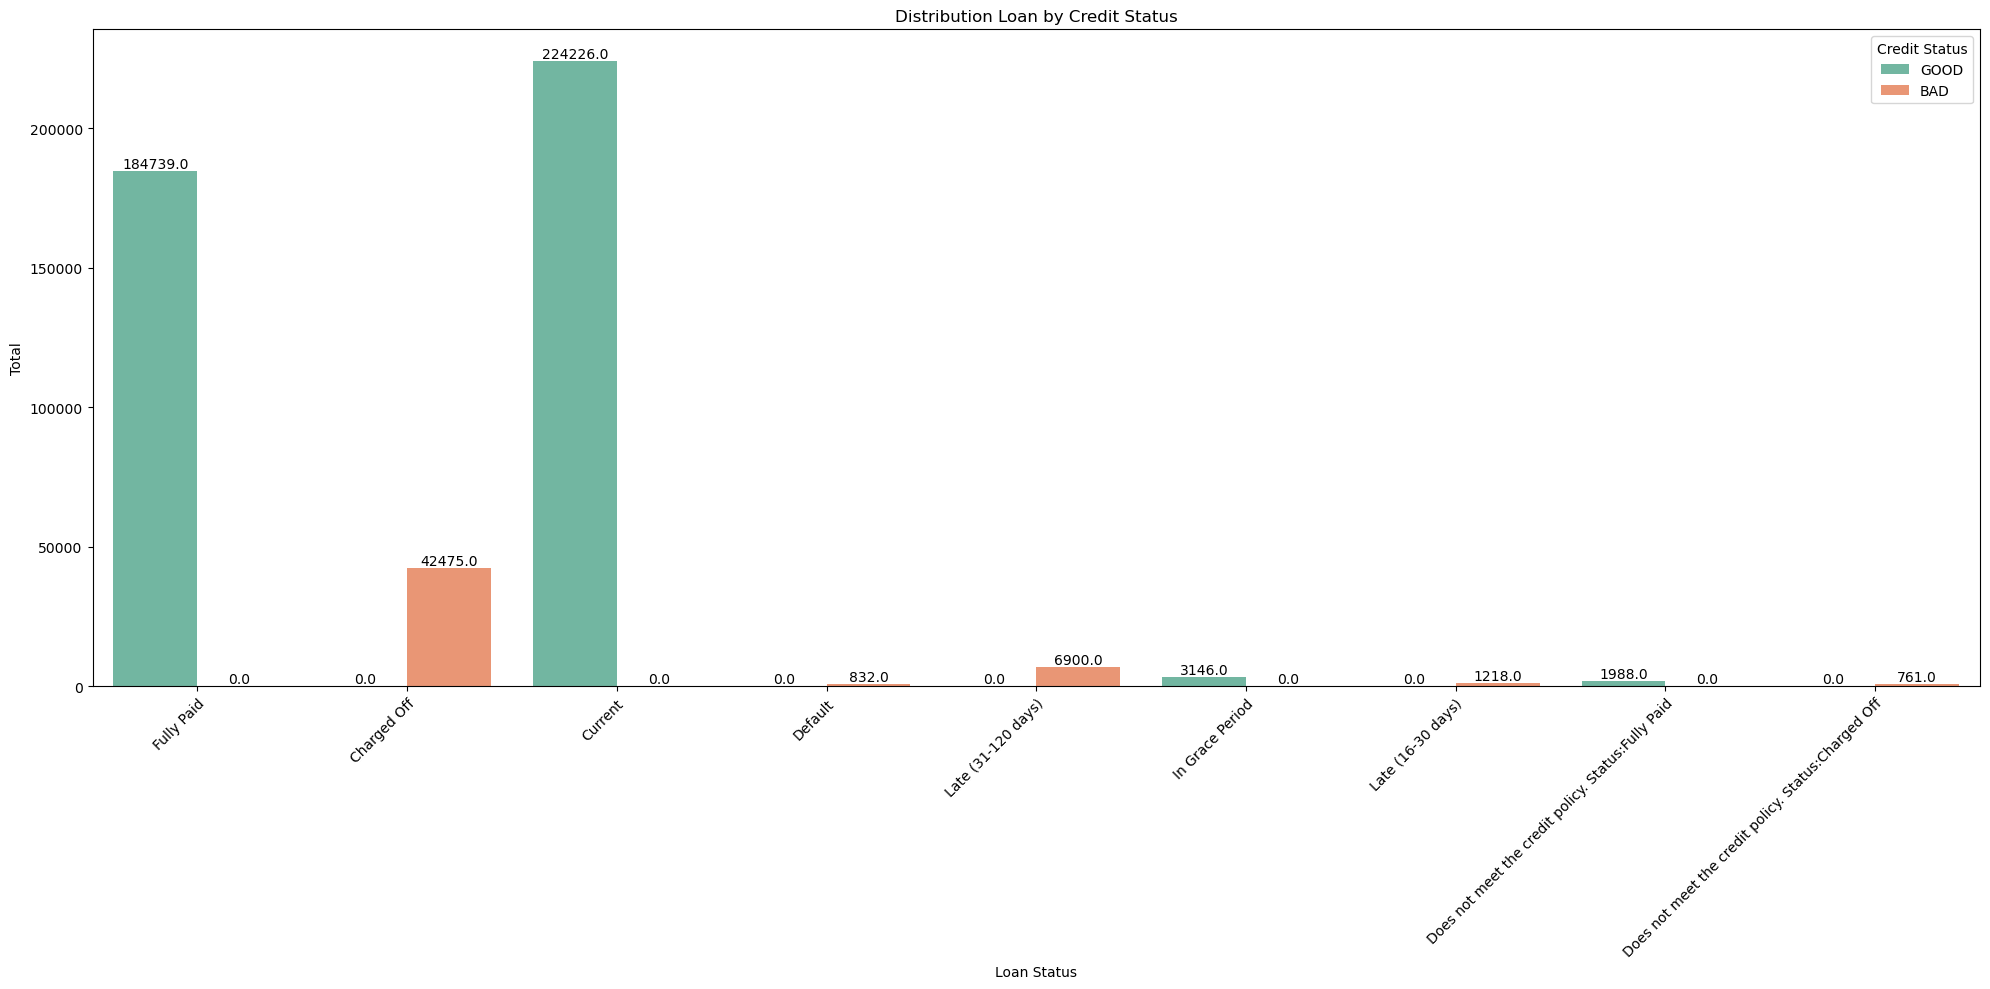

In [23]:
plt.figure(figsize=(20, 10))
ax = sns.countplot(x='loan_status', hue='credit_status', data=df, palette='Set2')

plt.xlabel('Loan Status')
plt.ylabel('Total')
plt.title('Distribution Loan by Credit Status')

for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                fontsize=10, color='black',
                xytext=(0, 5), textcoords='offset points')
plt.legend(title='Credit Status')

plt.xticks(rotation=45, ha='right', rotation_mode='anchor')  
plt.tight_layout()
plt.show()

### Feature Transformation

**Feature Transformation : Convert Object to Numerical without Hirarcy**

In [7]:
# 1.
# Convert Object to Numerical without Hirarcy
df['term'] = df['term'].str.replace(' months', '').astype(int)
df['home_ownership'] = df['home_ownership'].astype('category').cat.codes
df['verification_status'] = df['verification_status'].astype('category').cat.codes
df['purpose'] = df['purpose'].astype('category').cat.codes
df['initial_list_status'] = df['initial_list_status'].map({'f': 0, 'w': 1})

#2.
# Convert Object to DateTime
df['issue_d'] = pd.to_datetime(df['issue_d'], format='%b-%y')
df['last_pymnt_d'] = pd.to_datetime(df['last_pymnt_d'], format='%b-%y')
df['last_credit_pull_d'] = pd.to_datetime(df['last_credit_pull_d'], format='%b-%y')

# Convert DateTime to Numerical : YYYYMM
df['issue_d'] = df['issue_d'].apply(lambda x: int(x.strftime('%Y%m')))
df['last_pymnt_d'] = df['last_pymnt_d'].apply(lambda x: int(x.strftime('%Y%m')))
df['last_credit_pull_d'] = df['last_credit_pull_d'].apply(lambda x: int(x.strftime('%Y%m')))

**Feature Transformation : Convert Object to Numerical with Hirarcy**

**1. Grade**

In [8]:
# Map the Grade column based on its hierarchy
grade_mapping = {
    'A': 1,
    'B': 2,
    'C': 3,
    'D': 4,
    'E': 5,
    'F': 6,
    'G': 7
}

df['grade'] = df['grade'].map(grade_mapping)

**2. Sub_grade**

In [9]:
# Extract the numbers behind 'sub_grade'
df['sub_grade'] = df['sub_grade'].str.extract('(\d)').astype(int)

# Combine both into the 'sub_grade' column
df['sub_grade'] = df['grade'] * 10 + df['sub_grade']

**3. Emp_length**

In [10]:
# Map the Emp_length column based on its hierarchy
emp_length_mapping = {
    'Unknown': 0,
    '< 1 year': 1,
    '1 year': 2,
    '2 years': 3,
    '3 years': 4,
    '4 years': 5,
    '5 years': 6,
    '6 years': 7,
    '7 years': 8,
    '8 years': 9,
    '9 years': 10,
    '10+ years': 11
}

df['emp_length'] = df['emp_length'].map(emp_length_mapping)

**Loan_status**

In [11]:
loan_status_mapping = {
    'Fully Paid': 1,
    'Current': 2,
    'In Grace Period': 3,
    'Late (16-30 days)': 4,
    'Late (31-120 days)': 5,
    'Default': 6,
    'Charged Off': 7,
    'Does not meet the credit policy. Status:Fully Paid': 1,
    'Does not meet the credit policy. Status:Charged Off': 7
}
df['loan_status'] = df['loan_status'].map(loan_status_mapping)

**4. Payment_Plan**

In [12]:
df['pymnt_plan'] = df['pymnt_plan'].map({'n': 0, 'y': 1})

**5. Earliest_cr_line**

In [13]:
# Convert to DateTime
df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'], format='%b-%y')

# Calculate the Credit History Length (in years)
df['credit_history_length'] = (pd.to_datetime('today') - df['earliest_cr_line']).dt.days // 365

# Delete the original column
df.drop('earliest_cr_line', axis=1, inplace=True)

**6. Credit_status**

In [14]:
label_mapping = {'GOOD': 1, 'BAD': 0}
df['credit_label'] = df['credit_status'].map(label_mapping)

### Feature Selection

In [15]:
# Categorical Column
df_cat = df.select_dtypes(include='object')

# Numerical Column
numeric=['int8', 'int16', 'int32', 'int64', 'float16', 'float32', 'float64']
df_num = df.select_dtypes(include=numeric)

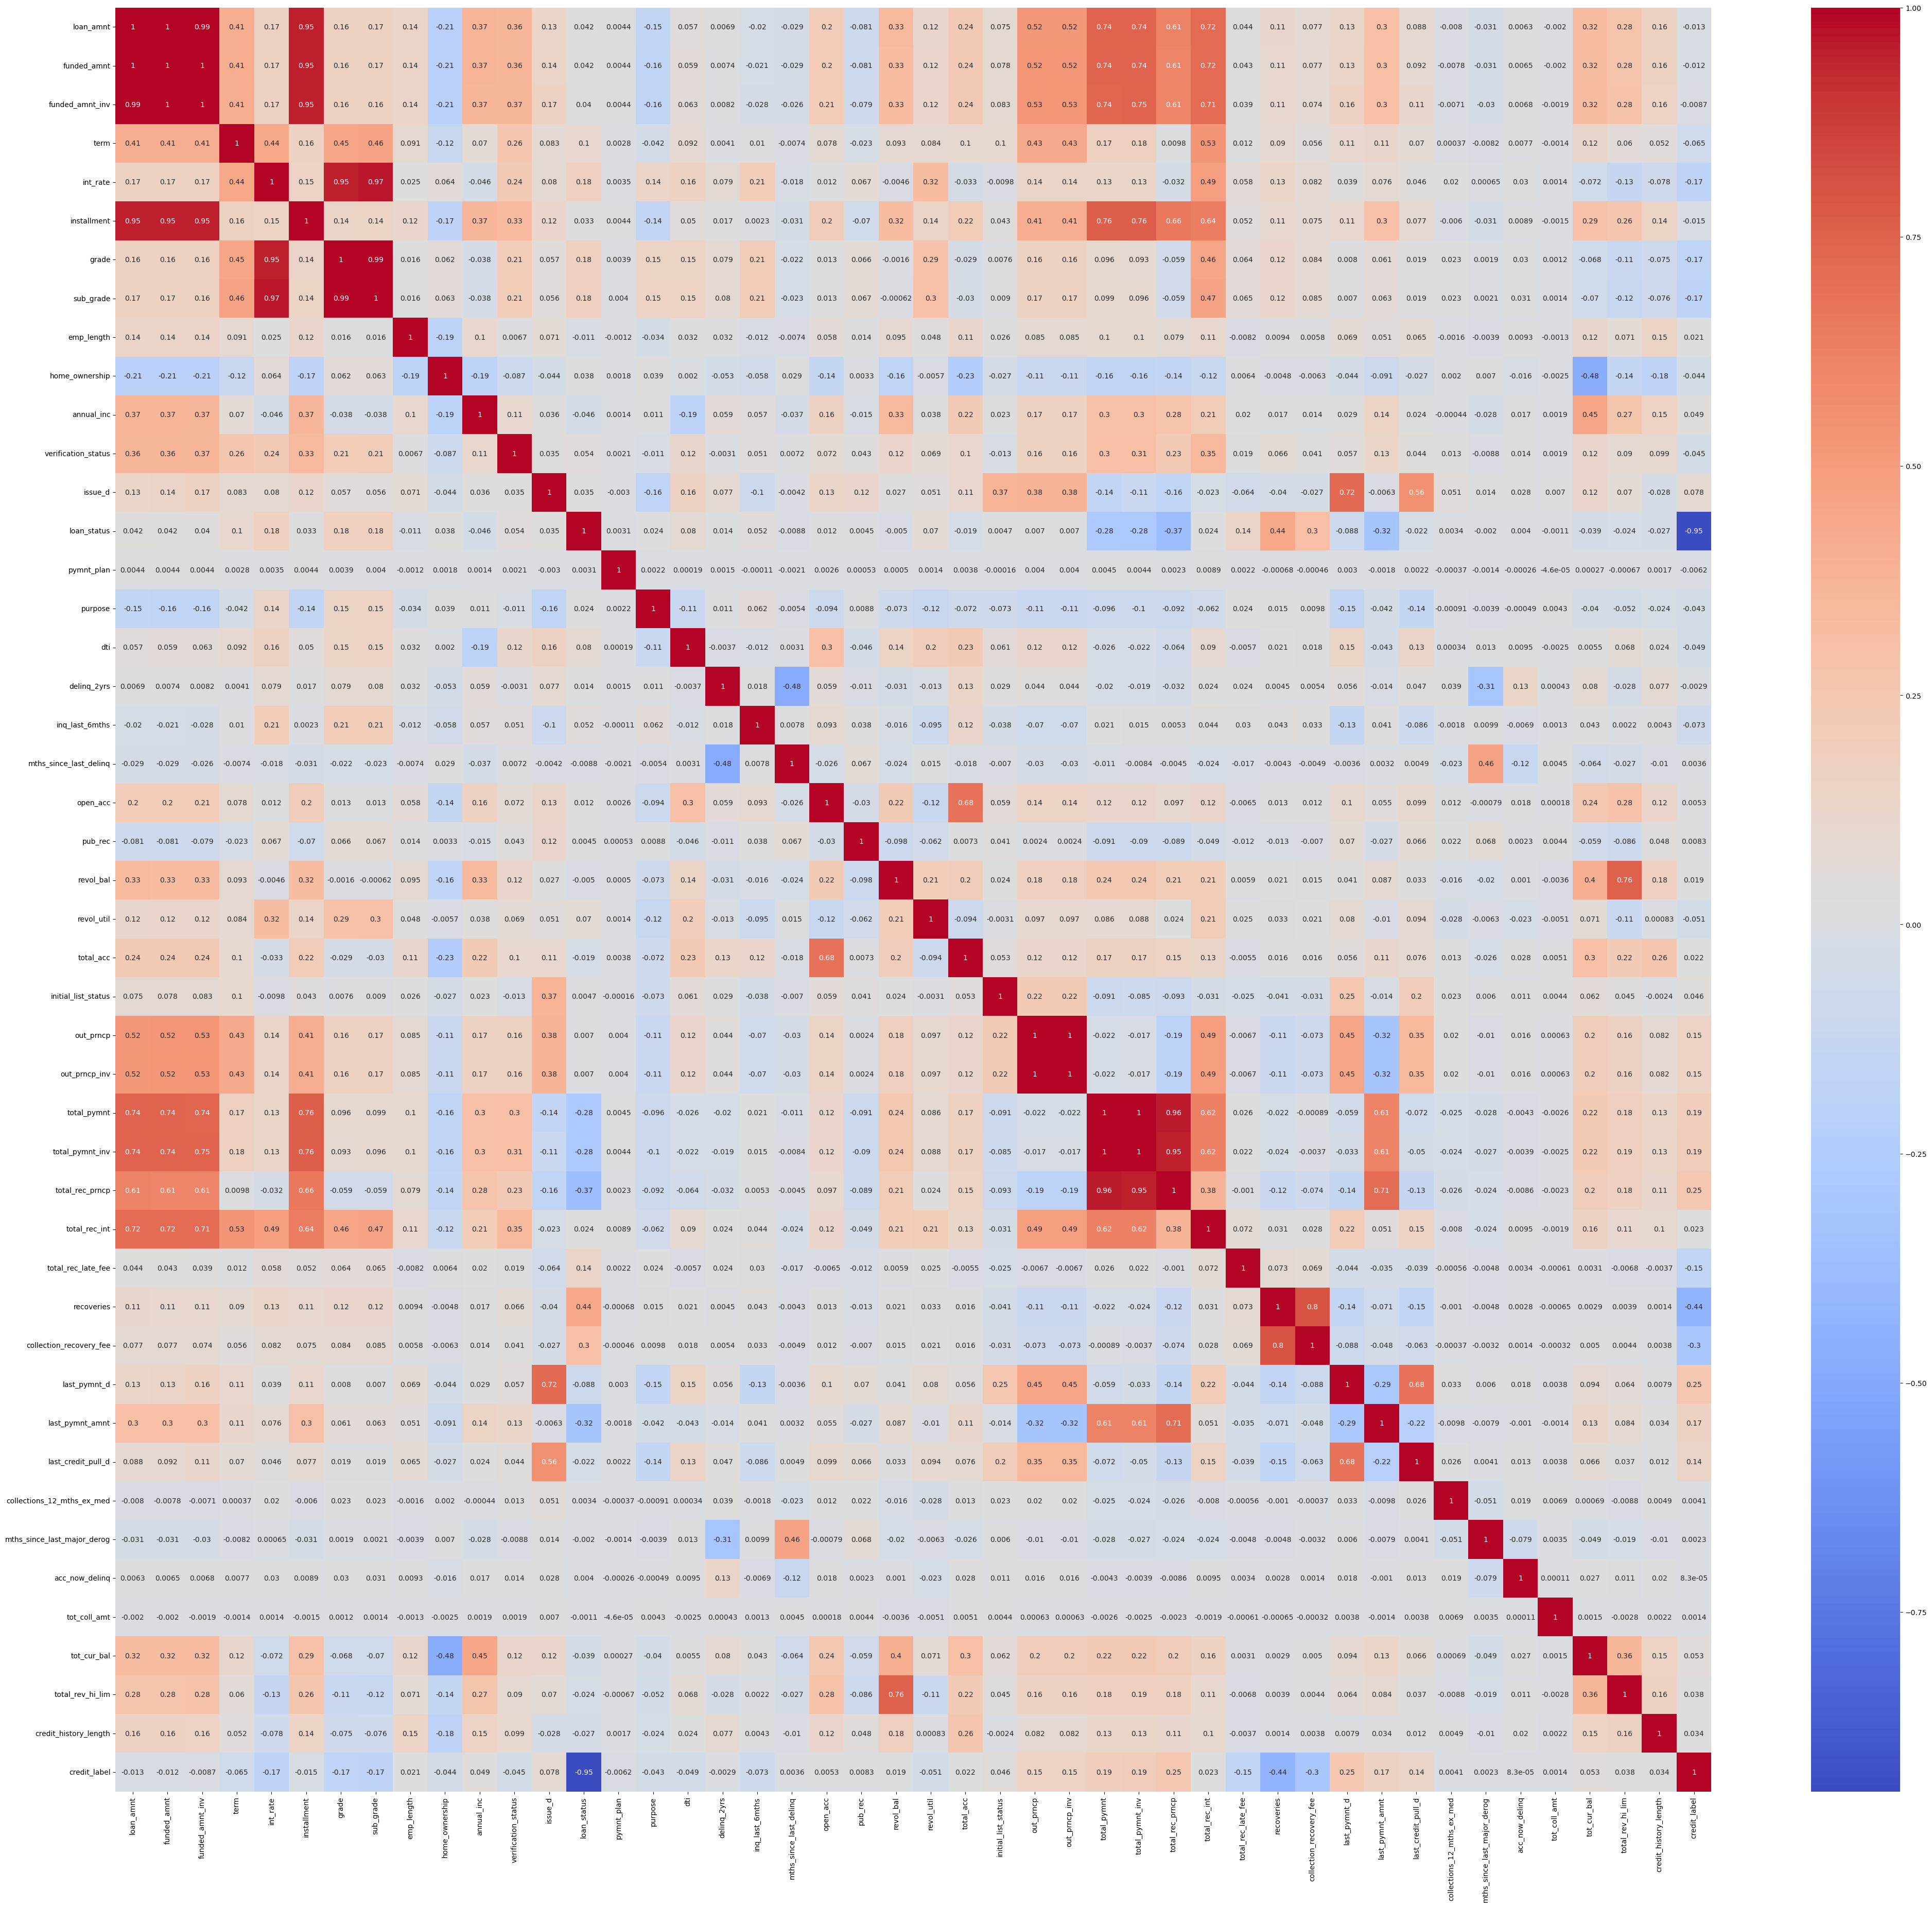

In [17]:
plt.figure(figsize=(50,45))
sns.heatmap(df_num.corr(), annot=True, cmap='coolwarm')
plt.show()

### **Delete Multicollinearity** <br>
After the pre-processing process, it was found that several features have a high correlation with each other, which could lead to multicollinearity or other issues affecting the stability of the model. Therefore, a decision was made to remove features with a correlation greater than 0.8.

In [16]:
df = df.drop(columns=['funded_amnt','funded_amnt_inv','installment','int_rate','sub_grade',
                      'out_prncp_inv','total_pymnt_inv','total_rec_prncp','collection_recovery_fee',
                      'loan_status'])

In [17]:
numeric=['int8', 'int16', 'int32', 'int64', 'float16', 'float32', 'float64']
df_num = df.select_dtypes(include=numeric)

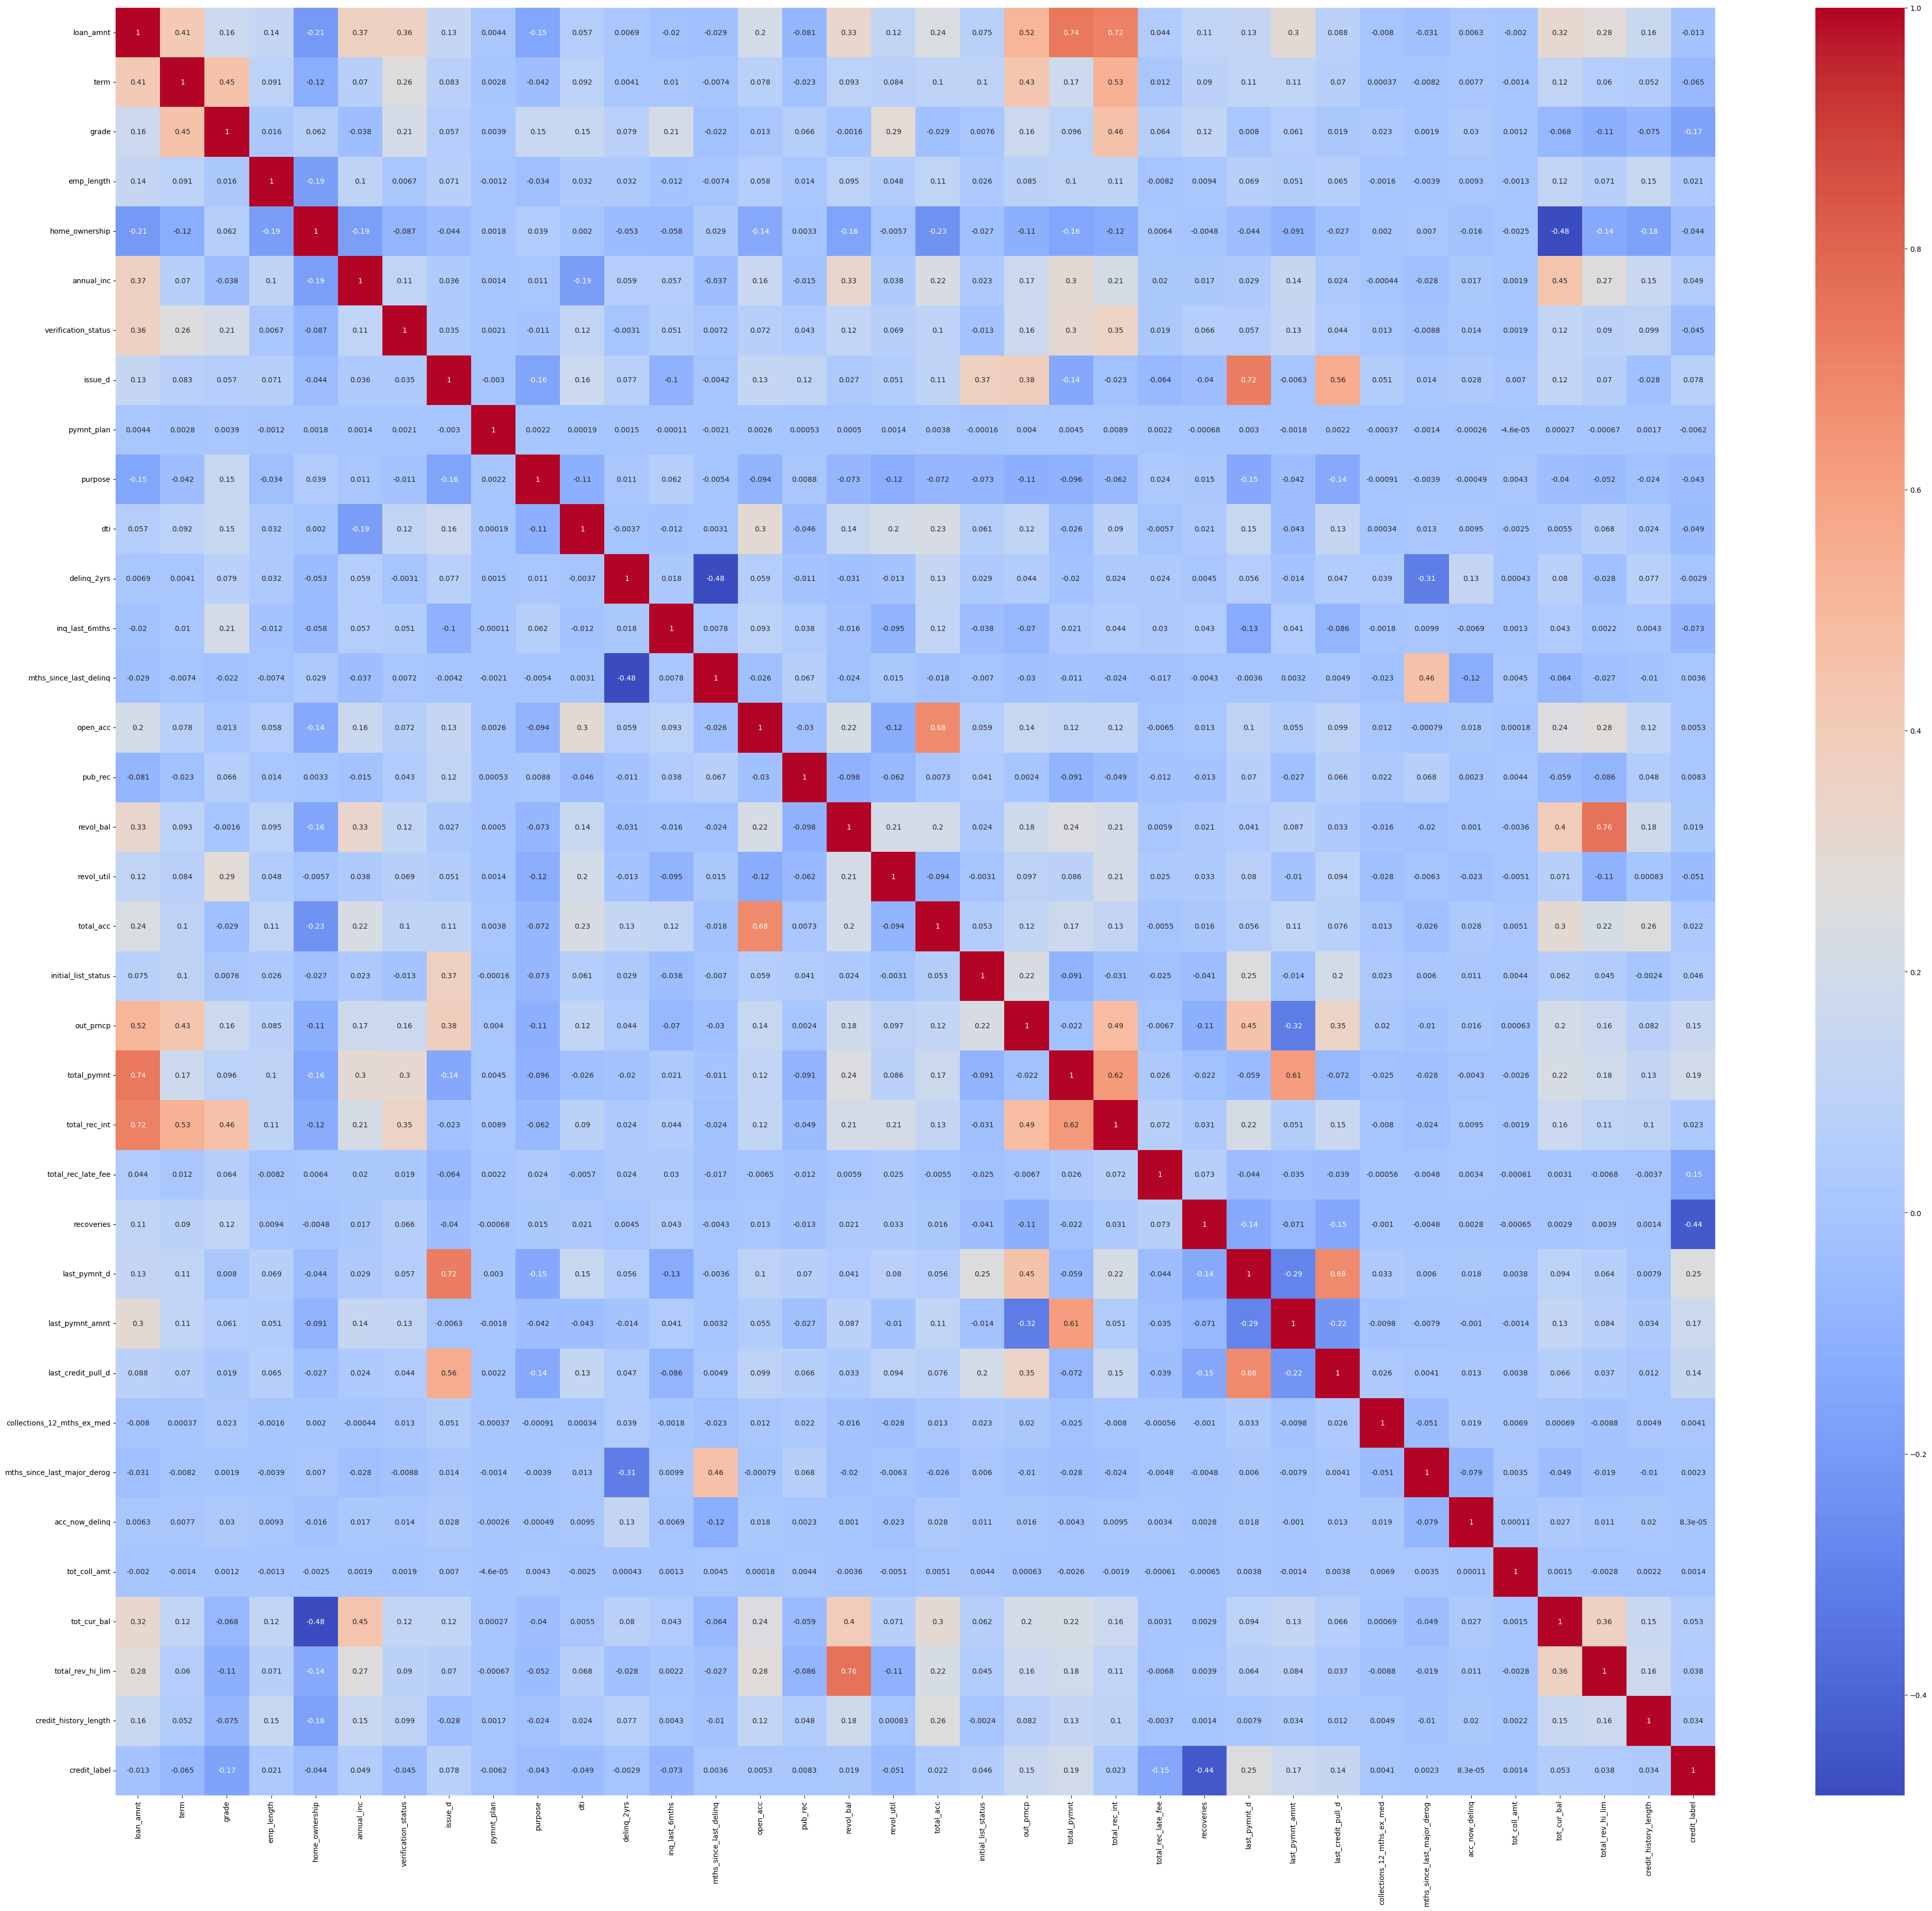

In [20]:
plt.figure(figsize=(50,45))
sns.heatmap(df_num.corr(), annot=True, cmap='coolwarm')
plt.show()

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   loan_amnt                    466285 non-null  int64  
 1   term                         466285 non-null  int32  
 2   grade                        466285 non-null  int64  
 3   emp_title                    466285 non-null  object 
 4   emp_length                   466285 non-null  int64  
 5   home_ownership               466285 non-null  int8   
 6   annual_inc                   466285 non-null  float64
 7   verification_status          466285 non-null  int8   
 8   issue_d                      466285 non-null  int64  
 9   pymnt_plan                   466285 non-null  int64  
 10  url                          466285 non-null  object 
 11  purpose                      466285 non-null  int8   
 12  title                        466285 non-null  object 
 13 

## Model Machine Learning

### Metrics Evaluation:
**1. Precision:**<br>
Precision measures how many of the positive predictions are actually correct.<br>
In the context of credit risk prediction, it indicates how many of the customers predicted to be high risk actually default on their loans.<br>
<br>
**2. Recall:**<br>
Recall measures how many of the actual positive cases are correctly identified.<br>
This is important in credit risk, as a high recall means the model successfully identifies more customers who are truly at risk, even if it results in some false positive predictions.<br>
<br>
**3. Classification Report:**<br>
The classification_report provides additional metrics, such as the F1-score, which is the harmonic mean of precision and recall, and support, which shows the number of samples in each class.<br>
It offers a more comprehensive view of the balance between precision and recall.

### Feature Importance with Random Forest Regressor

                        Feature  Importance
24                   recoveries    0.437564
7                       issue_d    0.156408
26              last_pymnt_amnt    0.152591
27           last_credit_pull_d    0.052840
25                 last_pymnt_d    0.045524
21                  total_pymnt    0.039019
0                     loan_amnt    0.028351
22                total_rec_int    0.016513
20                    out_prncp    0.013733
23           total_rec_late_fee    0.007295
1                          term    0.005440
10                          dti    0.004278
32                  tot_cur_bal    0.003920
17                   revol_util    0.003859
16                    revol_bal    0.003679
5                    annual_inc    0.003510
33             total_rev_hi_lim    0.003263
34        credit_history_length    0.002992
18                    total_acc    0.002756
3                    emp_length    0.002385
14                     open_acc    0.002365
13       mths_since_last_delinq 

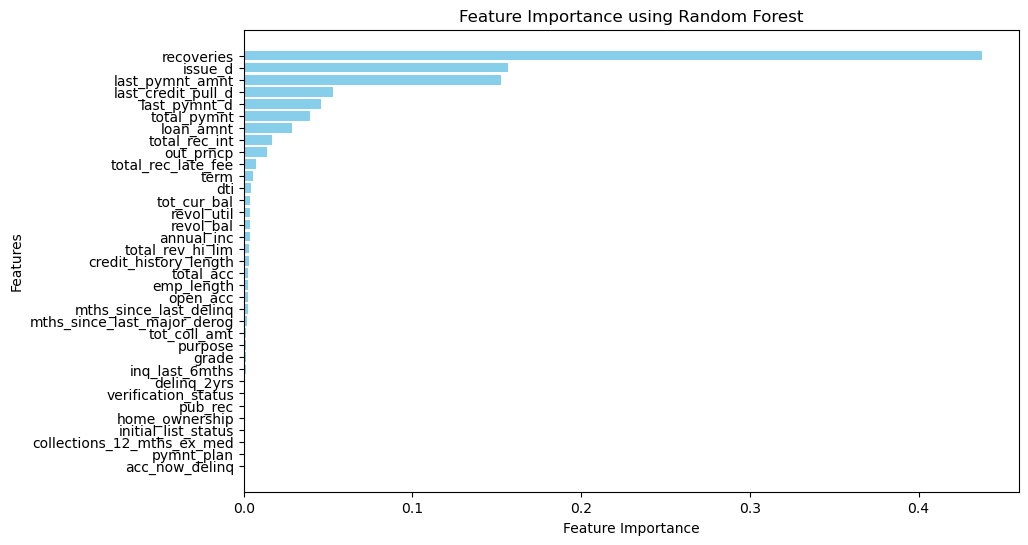

In [19]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

X = df_num.drop('credit_label', axis=1)
y = df_num['credit_label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

feature_importances = model.feature_importances_
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)
print(importance_df)

plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.gca().invert_yaxis()
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance using Random Forest')
plt.show()

## Modeling Machine Learning

### 1. Logistic Regression

Best Parameters for Logistic Regression: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
Train Evaluation:
Accuracy: 0.9578
Precision: 0.9847
Recall: 0.9676
F1 Score: 0.9761
ROC-AUC: 0.9803

Test Evaluation:
Accuracy: 0.9579
Precision: 0.9847
Recall: 0.9676
F1 Score: 0.9761
ROC-AUC: 0.9800


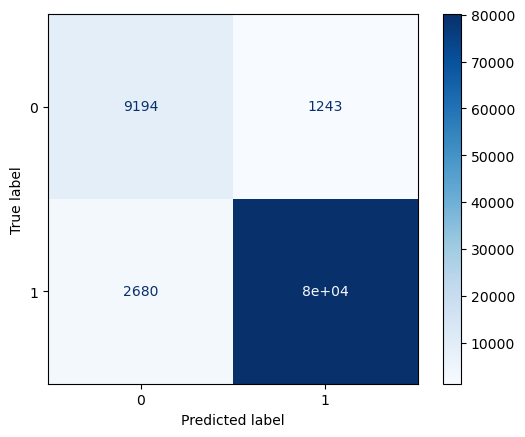

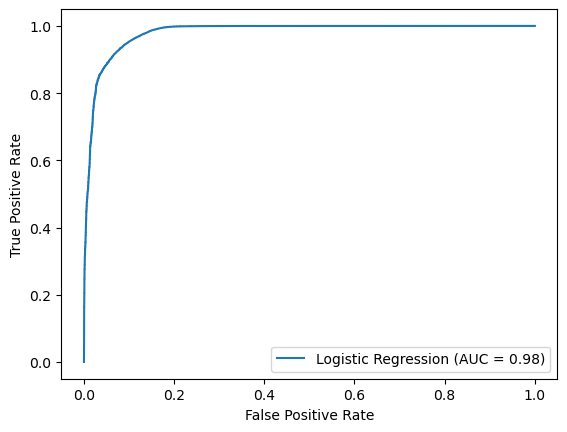

In [21]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (confusion_matrix, roc_curve, roc_auc_score, precision_score, recall_score, f1_score, 
                             accuracy_score, classification_report, ConfusionMatrixDisplay, RocCurveDisplay)
from imblearn.over_sampling import SMOTE

X = df_num.drop(columns=['credit_label'])
y = df_num['credit_label']

# Split Train and Test Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Oversampling using SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Hyperparameter tuning with GridSearchCV
param_grid = {
    'penalty': ['l2'],
    'C': [0.1, 1, 10],
    'solver': ['liblinear']
}

grid_search = GridSearchCV(LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42), 
                           param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
grid_search.fit(X_train_smote, y_train_smote)

# Best Model
gbest_model = grid_search.best_estimator_
print(f"Best Parameters for Logistic Regression: {grid_search.best_params_}")

# Evaluation Model in Data Train
y_train_pred = gbest_model.predict(X_train)
y_train_proba = gbest_model.predict_proba(X_train)[:, 1]

train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)
train_roc_auc = roc_auc_score(y_train, y_train_proba)

# Evaluation Model in Data Test
y_test_pred = gbest_model.predict(X_test)
y_test_proba = gbest_model.predict_proba(X_test)[:, 1]

test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)
test_roc_auc = roc_auc_score(y_test, y_test_proba)

print("Train Evaluation:")
print(f"Accuracy: {train_accuracy:.4f}")
print(f"Precision: {train_precision:.4f}")
print(f"Recall: {train_recall:.4f}")
print(f"F1 Score: {train_f1:.4f}")
print(f"ROC-AUC: {train_roc_auc:.4f}")

print("\nTest Evaluation:")
print(f"Accuracy: {test_accuracy:.4f}")
print(f"Precision: {test_precision:.4f}")
print(f"Recall: {test_recall:.4f}")
print(f"F1 Score: {test_f1:.4f}")
print(f"ROC-AUC: {test_roc_auc:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=gbest_model.classes_)
disp.plot(cmap='Blues')

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_test_proba)
RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=test_roc_auc, estimator_name='Logistic Regression').plot()

### **Logistic Regression Model Machine Learning**<br>

**Elements in the matrix:**<br>
True Negative (9194): The number of data points with an actual label of 0 and predicted as 0.<br>
False Positive (1243): The number of data points with an actual label of 0 but predicted as 1.<br>
False Negative (2680): The number of data points with an actual label of 1 but predicted as 0.<br>
True Positive (80000): The number of data points with an actual label of 1 and predicted as 1.<br>
<br>
**Performance:** Logistic Regression underperformed compared to the tree-based models: <br>
**Train Accuracy:** 95.78% | Test Accuracy: 95.79% <br>
**Train F1 Score:** 97.61% | Test F1 Score: 97.61% <br>
**ROC-AUC (Test):** 98.00% <br>
<br>
Parameter Optimization: Regularization (C=0.1, penalty='l2') improved performance slightly but was not sufficient to match the tree-based models.

### 2. Random Forest Regressor

Best Parameters for Random Forest: {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 150}
Train Evaluation:
Accuracy: 0.9961
Precision: 0.9956
Recall: 1.0000
F1 Score: 0.9978
ROC-AUC: 1.0000

Test Evaluation:
Accuracy: 0.9920
Precision: 0.9919
Recall: 0.9992
F1 Score: 0.9955
ROC-AUC: 0.9931


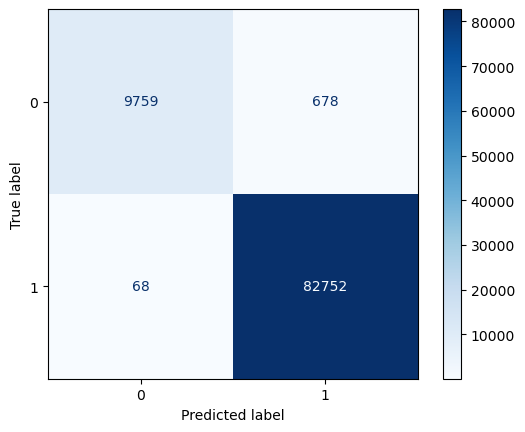

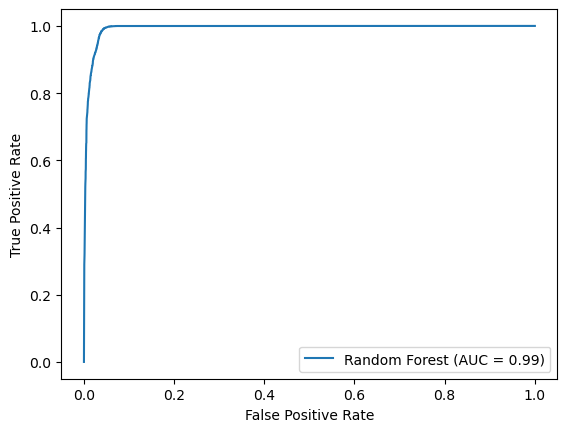

In [19]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (confusion_matrix, roc_curve, roc_auc_score, precision_score, recall_score, f1_score, 
                             accuracy_score, classification_report, ConfusionMatrixDisplay, RocCurveDisplay)
from imblearn.over_sampling import SMOTE

X = df_num.drop(columns=['credit_label'])
y = df_num['credit_label']

# Split Train and Test Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Oversampling with SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Hyperparameter tuning with GridSearchCV
param_grid = {
    'n_estimators': [100, 150], 
    'max_depth': [None, 10],  
    'min_samples_split': [2, 5], 
    'min_samples_leaf': [1, 2],   
    'bootstrap': [True] 
}

grid_search = GridSearchCV(RandomForestClassifier(class_weight='balanced', random_state=42), 
                           param_grid, cv=3, scoring='roc_auc', n_jobs=-1)
grid_search.fit(X_train_smote, y_train_smote)

# Best Model
gbest_model = grid_search.best_estimator_
print(f"Best Parameters for Random Forest: {grid_search.best_params_}")

# Evaluation Model in Train Data
y_train_pred = gbest_model.predict(X_train)
y_train_proba = gbest_model.predict_proba(X_train)[:, 1]

train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)
train_roc_auc = roc_auc_score(y_train, y_train_proba)

# Evaluation Model in Test Data
y_test_pred = gbest_model.predict(X_test)
y_test_proba = gbest_model.predict_proba(X_test)[:, 1]

test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)
test_roc_auc = roc_auc_score(y_test, y_test_proba)

print("Train Evaluation:")
print(f"Accuracy: {train_accuracy:.4f}")
print(f"Precision: {train_precision:.4f}")
print(f"Recall: {train_recall:.4f}")
print(f"F1 Score: {train_f1:.4f}")
print(f"ROC-AUC: {train_roc_auc:.4f}")

print("\nTest Evaluation:")
print(f"Accuracy: {test_accuracy:.4f}")
print(f"Precision: {test_precision:.4f}")
print(f"Recall: {test_recall:.4f}")
print(f"F1 Score: {test_f1:.4f}")
print(f"ROC-AUC: {test_roc_auc:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=gbest_model.classes_)
disp.plot(cmap='Blues')

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_test_proba)
RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=test_roc_auc, estimator_name='Random Forest').plot()

### **Random Forest Model Machine Learning**<br>

**Elements in the matrix:**<br>
True Negative (9759): The number of data points with an actual label of 0 and predicted as 0.<br>
False Positive (678): The number of data points with an actual label of 0 but predicted as 1.<br>
False Negative (68): The number of data points with an actual label of 1 but predicted as 0.<br>
True Positive (82752): The number of data points with an actual label of 1 and predicted as 1.<br>
<br>
**Performance:** Random Forest showed strong results, though slightly lower than XGBoost and LightGBM:<br>
**Train Accuracy:** 99.61% | Test Accuracy: 99.20%<br>
**Train F1 Score:** 99.78% | Test F1 Score: 99.55%<br>
**ROC-AUC (Test):** 99.31%<br>
<br>
Parameter Optimization: Optimal parameters (e.g., n_estimators=150) improved the model’s accuracy and recall.

### 3. XGBoost

Best Parameters for XGBoost: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 150, 'subsample': 0.8}
Train Evaluation:
Accuracy: 0.9936
Precision: 0.9931
Recall: 0.9998
F1 Score: 0.9964
ROC-AUC: 0.9967

Test Evaluation:
Accuracy: 0.9933
Precision: 0.9929
Recall: 0.9996
F1 Score: 0.9963
ROC-AUC: 0.9956


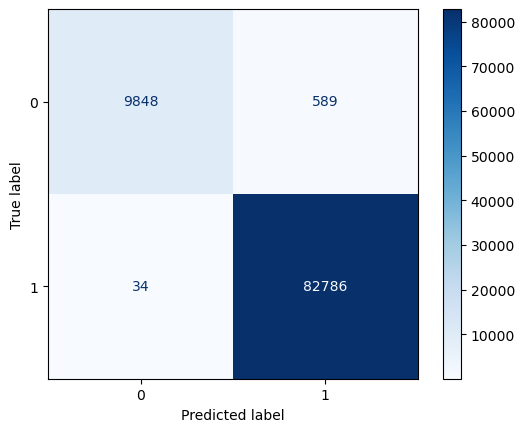

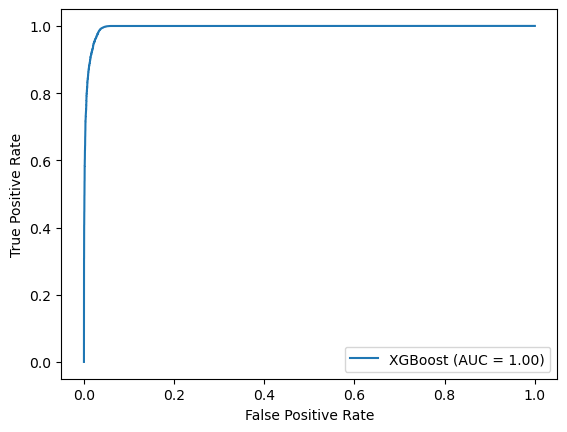

In [18]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import (confusion_matrix, roc_curve, roc_auc_score, precision_score, recall_score, f1_score, 
                             accuracy_score, classification_report, ConfusionMatrixDisplay, RocCurveDisplay)
from imblearn.over_sampling import SMOTE

X = df_num.drop(columns=['credit_label'])
y = df_num['credit_label']

# Split Train and Test Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Oversampling with SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Hyperparameter tuning with GridSearchCV
param_grid = {
    'n_estimators': [100, 150],
    'max_depth': [3, 6],     
    'learning_rate': [0.01, 0.1],
    'subsample': [0.8, 1.0], 
    'colsample_bytree': [0.8, 1.0]
}

grid_search = GridSearchCV(XGBClassifier(scale_pos_weight=1, random_state=42), 
                           param_grid, cv=3, scoring='roc_auc', n_jobs=-1)  
grid_search.fit(X_train_smote, y_train_smote)

# Best Model
gbest_model = grid_search.best_estimator_
print(f"Best Parameters for XGBoost: {grid_search.best_params_}")

# Evaluation Model in Train Data
y_train_pred = gbest_model.predict(X_train)
y_train_proba = gbest_model.predict_proba(X_train)[:, 1]

train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)
train_roc_auc = roc_auc_score(y_train, y_train_proba)

# Ecaluation Model in Test Data
y_test_pred = gbest_model.predict(X_test)
y_test_proba = gbest_model.predict_proba(X_test)[:, 1]

test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)
test_roc_auc = roc_auc_score(y_test, y_test_proba)

print("Train Evaluation:")
print(f"Accuracy: {train_accuracy:.4f}")
print(f"Precision: {train_precision:.4f}")
print(f"Recall: {train_recall:.4f}")
print(f"F1 Score: {train_f1:.4f}")
print(f"ROC-AUC: {train_roc_auc:.4f}")

print("\nTest Evaluation:")
print(f"Accuracy: {test_accuracy:.4f}")
print(f"Precision: {test_precision:.4f}")
print(f"Recall: {test_recall:.4f}")
print(f"F1 Score: {test_f1:.4f}")
print(f"ROC-AUC: {test_roc_auc:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=gbest_model.classes_)
disp.plot(cmap='Blues')

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_test_proba)
RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=test_roc_auc, estimator_name='XGBoost').plot()

### **XGBoost Model Machine Learning**<br>

**Elements in the matrix:**<br>
True Negative (9848): The number of data points with an actual label of 0 and predicted as 0.<br>
False Positive (589): The number of data points with an actual label of 0 but predicted as 1.<br>
False Negative (34): The number of data points with an actual label of 1 but predicted as 0.<br>
True Positive (82786): The number of data points with an actual label of 1 and predicted as 1.<br>
<br>
**Performance:** XGBoost consistently delivered the best results among all models, achieving the highest scores across all metrics:<br>
**Train Accuracy:** 99.36% | **Test Accuracy:** 99.33% <br>
**Train F1 Score:** 99.64% | **Test F1 Score:** 99.63% <br>
**ROC-AUC (Test):** 99.56% <br>
<br>
Parameter Optimization: Tuned hyperparameters (e.g., max_depth=6, n_estimators=150) significantly improved its predictive performance.

### 4. LightGBM

[LightGBM] [Info] Number of positive: 331279, number of negative: 331279
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.043336 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6683
[LightGBM] [Info] Number of data points in the train set: 662558, number of used features: 34
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Best Parameters for LightGBM: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 100, 'subsample': 0.8}
Train Evaluation:
Accuracy: 0.9926
Precision: 0.9923
Recall: 0.9995
F1 Score: 0.9959
ROC-AUC: 0.9953

Test Evaluation:
Accuracy: 0.9925
Precision: 0.9923
Recall: 0.9994
F1 Score: 0.9958
ROC-AUC: 0.9950


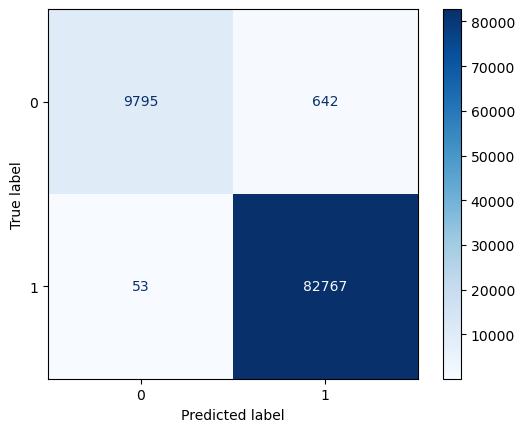

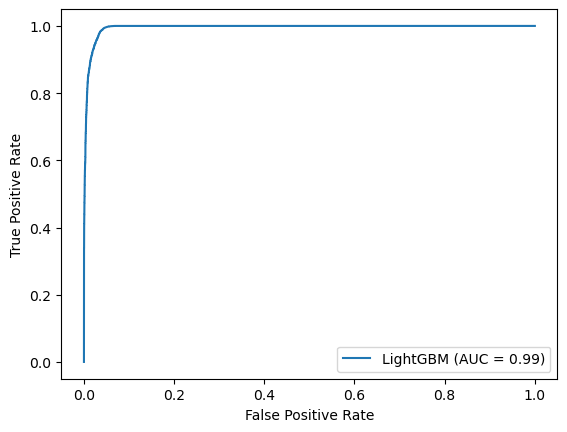

In [19]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from lightgbm import LGBMClassifier
from sklearn.metrics import (confusion_matrix, roc_curve, roc_auc_score, precision_score, recall_score, f1_score, 
                             accuracy_score, classification_report, ConfusionMatrixDisplay, RocCurveDisplay)
from imblearn.over_sampling import SMOTE

X = df_num.drop(columns=['credit_label'])
y = df_num['credit_label']

# Split Train and Test Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Oversampling with SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Hyperparameter tuning with GridSearchCV
param_grid = {
    'n_estimators': [50, 100], 
    'max_depth': [3, 6],         
    'learning_rate': [0.01, 0.1],  
    'subsample': [0.8, 1.0],    
    'colsample_bytree': [0.8, 1.0] 
}

grid_search = GridSearchCV(LGBMClassifier(scale_pos_weight=1, random_state=42), 
                           param_grid, cv=3, scoring='roc_auc', n_jobs=-1)
grid_search.fit(X_train_smote, y_train_smote)

# Best Model
gbest_model = grid_search.best_estimator_
print(f"Best Parameters for LightGBM: {grid_search.best_params_}")

# Evaluation Model in Train Data
y_train_pred = gbest_model.predict(X_train)
y_train_proba = gbest_model.predict_proba(X_train)[:, 1]

train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)
train_roc_auc = roc_auc_score(y_train, y_train_proba)

# Evaluation Model in Test Data
y_test_pred = gbest_model.predict(X_test)
y_test_proba = gbest_model.predict_proba(X_test)[:, 1]

test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)
test_roc_auc = roc_auc_score(y_test, y_test_proba)

print("Train Evaluation:")
print(f"Accuracy: {train_accuracy:.4f}")
print(f"Precision: {train_precision:.4f}")
print(f"Recall: {train_recall:.4f}")
print(f"F1 Score: {train_f1:.4f}")
print(f"ROC-AUC: {train_roc_auc:.4f}")

print("\nTest Evaluation:")
print(f"Accuracy: {test_accuracy:.4f}")
print(f"Precision: {test_precision:.4f}")
print(f"Recall: {test_recall:.4f}")
print(f"F1 Score: {test_f1:.4f}")
print(f"ROC-AUC: {test_roc_auc:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=gbest_model.classes_)
disp.plot(cmap='Blues')

#ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_test_proba)
RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=test_roc_auc, estimator_name='LightGBM').plot()

### Light GBM Model Machine Learning 

**Elements in the matrix:**<br>
True Negative (9795): The number of data points with an actual label of 0 and predicted as 0.<br>
False Positive (642): The number of data points with an actual label of 0 but predicted as 1.<br>
False Negative (53): The number of data points with an actual label of 1 but predicted as 0.<br>
True Positive (82767): The number of data points with an actual label of 1 and predicted as 1.<br>
<br>
**Performance:** LightGBM also performed very well, closely following XGBoost: <br>
Train Accuracy: 99.26% | Test Accuracy: 99.25% <br> 
Train F1 Score: 99.59% | Test F1 Score: 99.58% <br>
ROC-AUC (Test): 99.50% <br>
<br>
Parameter Optimization: Tuned hyperparameters (e.g., max_depth=6, n_estimators=100) helped improve its performance.